<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
import io
import ipywidgets as wg
from keras.regularizers import l1,l2
from keras.layers import Dropout
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [3]:
path = 'EnergyMolecule/roboBohr.csv'

## Pregunta 1

### **a) Construya un dataframe con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas**

In [4]:
df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total = len(df)

print(df.shape)
print(df.info())

dfTrain = df[:int(0.6*total)]
dfVal = df[int(0.6*total):int(0.85*total)]
dfTest = df[int(0.85*total)::]

(16242, 1276)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1276 entries, 0 to Eat
dtypes: float64(1276)
memory usage: 158.1 MB
None


Los datos corresponden a un csv compuesto de 1276 columnas correspondientes a las variables, y 16242 filas que corresponden a las diferentes simulaciones.

Las columnas 'Unnamed: 0' y 'pubchem_id' se eliminan por no tener datos relevante para los conjuntos de entrenamiento, validación y testeo. 'Unnamed: 0' no es necesaria debido a que corresponde a una enumeración, y el dataframe de pandas ya viene con una incluída. 'pubchem_id' no es necesaria tampoco pues corresponde a la ID de la simulación.

### a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento

Para un mejor funcionamiento de los algoritmos de Machine learning, hay que normalizar las variables de entrada del algoritmo, Normalizar, hace referencia a extender o comprimir los valores de una variable para estar en un rango definido. Es decir, realiza una ponderación de las caracterisiticas de una mejor manera y ademas se reduce el facor de escala. Sin embargo, realizar una mala eleccion del metodo de normalización puede alterar los resultados del analisis de datos. En este caso, se realiza una estandarización de los datos, debido a que si usamos normalización los outlayers podrían causar un desbalance de los datos en el intervalo, haciendo que muchos de ellos se agrupen cerca del 0.0 y que el outlayer quede como -1 o 1.


In [5]:
#Pre-processing#

#x var's
xTrain = pd.DataFrame.copy(dfTrain)
xVal = pd.DataFrame.copy(dfVal)
xTest = pd.DataFrame.copy(dfTest)

#Scaler
scaler = StandardScaler().fit(xTrain)

#All standarized
xTrainScaled = pd.DataFrame(scaler.transform(xTrain),columns=xTrain.columns)
xValScaled = pd.DataFrame(scaler.transform(xVal),columns=xVal.columns)
xTestScaled = pd.DataFrame(scaler.transform(xTest),columns=xTest.columns)

#y var's
yTrain = xTrain.pop('Eat').values.reshape(-1, 1)
yVal = xVal.pop('Eat').values.reshape(-1, 1)
yTest = xTest.pop('Eat').values.reshape(-1, 1)

### b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [6]:
def plotArrays(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()

In [ ]:
model_1b = Sequential()
model_1b.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_1b.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model_1b.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']

history1b = model_1b.fit(xTrainScaled.values,
                    yTrain,
                    epochs = 250,
                    verbose = 1,
                    validation_data = (xValScaled.values, yVal))

result = pd.DataFrame(history1b.history)
result.to_csv("history1b.csv")

> El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

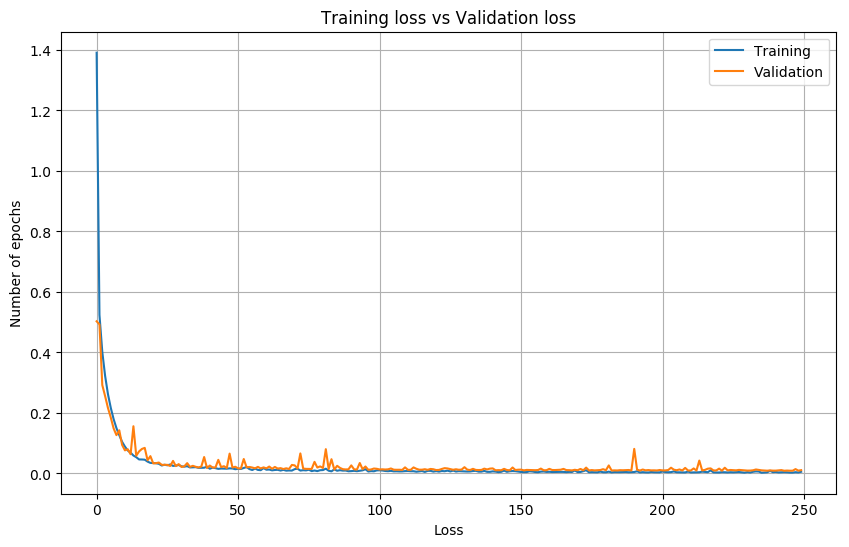

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
history1b = pd.read_csv("history1b.csv")
train_loss = history1b['loss']
val_loss = history1b['val_loss']
plotArrays(train_loss, val_loss, 250, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

> Usando la función de activación sigmoidal, podemos ver que el error va decreciendo a medida que se aumenta el número de epochs. Por lo tanto este metodo converge.

> Para el conjunto de pruebas, el error cuadrático converge a:

In [ ]:
model_1b.evaluate(xTestScaled.values, yTest)

> Para el conjunto de validación, el error cuadrático converge a:

In [ ]:
model_1b.evaluate(xValScaled.values, yVal)

> Para el conjunto de entrenamiento, el error cuadrático converge a:

In [ ]:
model_1b.evaluate(xTrainScaled.values, yTrain)

### c) Repita el paso anterior, utilizado ’ReLU’ como función de activación y compare con lo obtenido en b). 

In [ ]:
model_1c = Sequential()
model_1c.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation='relu'))
model_1c.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model_1c.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']

history1c = model_1c.fit(xTrainScaled.values,
                    yTrain,
                    epochs = 250,
                    verbose = 1,
                    validation_data = (xValScaled.values, yVal))

> El metodo con función de activación relu converge para esta configuración de parámetros.  En cambio, si se disminuye el learning rate en un factor de 10, el metodo converge:

In [ ]:
model_1c = Sequential()
model_1c.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation='relu'))
model_1c.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model_1c.compile(optimizer=SGD(lr=0.01/10),loss='mean_squared_error') #, metrics=['accuracy']

history1c = model_1c.fit(xTrainScaled.values,
                    yTrain,
                    epochs = 250,
                    verbose = 1,
                    validation_data = (xValScaled.values, yVal))

result = pd.DataFrame(history1c.history)
result.to_csv("history1c.csv")

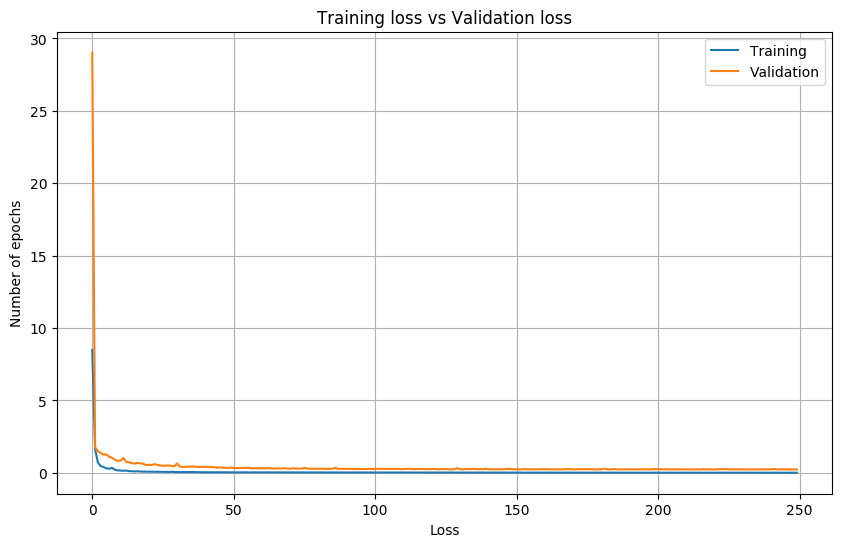

In [9]:
plt.rcParams.update(plt.rcParamsDefault)
history1c = pd.read_csv("history1c.csv")
train_loss = history1c['loss']
val_loss = history1c['val_loss']
plotArrays(train_loss, val_loss, 250, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

In [ ]:
model_1c.evaluate(xTestScaled.values, yTest)

In [ ]:
model_1c.evaluate(xValScaled.values, yVal)

In [ ]:
model_1c.evaluate(xTrainScaled.values, yTrain)

> Dividiendo el learning rate en un factor de 10, ahora el metodo obtiene resultados distintos de *nan* y el error converge.


### d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [10]:
n_lr = 10
lr_start = 0.001
lr_end = 0.051
epochs = 250

def iterateOverLearningRate(n_lr, lr_start, lr_end, activ, numEpochs, file):
    lear_rate = np.linspace(lr_start, lr_end, n_lr)
    histories = dict()

    for i in range (n_lr):
        print("\nIteración:", i, "Learning Rate: ", lear_rate[i])
        model = Sequential()
        model.add(Dense(256, input_dim = xTrainScaled.shape[1], kernel_initializer = 'uniform', activation = activ))
        model.add(Dense(1, kernel_initializer = 'uniform', activation = "linear"))
        model.compile(optimizer = SGD(lr = lear_rate[i]),loss = 'mean_squared_error')
        histories[i] = pd.DataFrame(model.fit(xTrainScaled.values,
                        yTrain,
                        epochs = numEpochs,
                        verbose = 1,
                        validation_data=(xValScaled.values, yVal)).history)
    result = pd.concat(histories)
    result.to_csv(file)

In [35]:
iterateOverLearningRate(n_lr, lr_start, lr_end, "sigmoid", epochs, "histories1d-b.csv")


Iteración: 0 Learning Rate:  0.001
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s - loss: 3.6696 - val_loss: 1.1119
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 1.1198 - val_loss: 0.8382
Epoch 3/250
9745/9745 [==============================] - 1s - loss: 0.9210 - val_loss: 0.7190
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 0.8028 - val_loss: 0.6243
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 0.7274 - val_loss: 0.5700
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 0.6739 - val_loss: 0.5425
Epoch 7/250
9745/9745 [==============================] - 1s - loss: 0.6327 - val_loss: 0.5073
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 0.6028 - val_loss: 0.4821
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 0.5773 - val_loss: 0.4609
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 0

9745/9745 [==============================] - 1s - loss: 0.0204 - val_loss: 0.0283
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 0.0201 - val_loss: 0.0283
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 0.0199 - val_loss: 0.0285
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 0.0197 - val_loss: 0.0277
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0194 - val_loss: 0.0285
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 0.0192 - val_loss: 0.0272
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0190 - val_loss: 0.0273
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0187 - val_loss: 0.0272
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0185 - val_loss: 0.0270
Epoch 180/250
9745/9745 [==============================] - 0s - loss: 0.0183 - val_loss: 0.0266
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0141
Epoch 92/250
9745/9745 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0326
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 0.0065 - val_loss: 0.0152
Epoch 94/250
9745/9745 [==============================] - 0s - loss: 0.0071 - val_loss: 0.0131
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 0.0062 - val_loss: 0.0147
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 0.0066 - val_loss: 0.0131
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 0.0063 - val_loss: 0.0128
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 0.0057 - val_loss: 0.0178
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 0.0063 - val_loss: 0.0123
Epoch 100/250
9745/9745 [==============================] - 1s - loss: 0.0067 - val_loss: 0.0318
Epoch 101/250
9745/9745 [==============================] - 1s 

9745/9745 [==============================] - 1s - loss: 0.0937 - val_loss: 0.1302
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 0.0782 - val_loss: 0.0734
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 0.0676 - val_loss: 0.0857
Epoch 13/250
9745/9745 [==============================] - 1s - loss: 0.0636 - val_loss: 0.0891
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 0.0712 - val_loss: 0.0460
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 0.0516 - val_loss: 0.0438
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 0.0479 - val_loss: 0.0667
Epoch 17/250
9745/9745 [==============================] - 1s - loss: 0.0466 - val_loss: 0.0718
Epoch 18/250
9745/9745 [==============================] - 1s - loss: 0.0476 - val_loss: 0.0491
Epoch 19/250
9745/9745 [==============================] - 1s - loss: 0.0423 - val_loss: 0.0376
Epoch 20/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.0041 - val_loss: 0.0110
Epoch 182/250
9745/9745 [==============================] - 1s - loss: 0.0045 - val_loss: 0.0243
Epoch 183/250
9745/9745 [==============================] - 1s - loss: 0.0041 - val_loss: 0.0102
Epoch 184/250
9745/9745 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0104
Epoch 185/250
9745/9745 [==============================] - 1s - loss: 0.0042 - val_loss: 0.0107
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 0.0042 - val_loss: 0.0140
Epoch 187/250
9745/9745 [==============================] - 1s - loss: 0.0059 - val_loss: 0.0104
Epoch 188/250
9745/9745 [==============================] - 1s - loss: 0.0079 - val_loss: 0.0101
Epoch 189/250
9745/9745 [==============================] - 1s - loss: 0.0062 - val_loss: 0.0102
Epoch 190/250
9745/9745 [==============================] - 1s - loss: 0.0047 - val_loss: 0.0194
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0264
Epoch 102/250
9745/9745 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0192
Epoch 103/250
9745/9745 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0678
Epoch 104/250
9745/9745 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0164
Epoch 105/250
9745/9745 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0197
Epoch 106/250
9745/9745 [==============================] - 1s - loss: 0.0178 - val_loss: 0.0230
Epoch 107/250
9745/9745 [==============================] - 0s - loss: 0.0131 - val_loss: 0.0190
Epoch 108/250
9745/9745 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0161
Epoch 109/250
9745/9745 [==============================] - 1s - loss: 0.0172 - val_loss: 0.0154
Epoch 110/250
9745/9745 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0162
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 2.7343 - val_loss: 5.4671
Epoch 21/250
9745/9745 [==============================] - 1s - loss: 3.4346 - val_loss: 5.8045
Epoch 22/250
9745/9745 [==============================] - 1s - loss: 2.7097 - val_loss: 3.9501
Epoch 23/250
9745/9745 [==============================] - 0s - loss: 2.7934 - val_loss: 2.9631
Epoch 24/250
9745/9745 [==============================] - 0s - loss: 2.3167 - val_loss: 3.0909
Epoch 25/250
9745/9745 [==============================] - 0s - loss: 2.0411 - val_loss: 2.6228
Epoch 26/250
9745/9745 [==============================] - 0s - loss: 2.1459 - val_loss: 6.8035
Epoch 27/250
9745/9745 [==============================] - 1s - loss: 2.1423 - val_loss: 3.3466
Epoch 28/250
9745/9745 [==============================] - 0s - loss: 2.3062 - val_loss: 2.6718
Epoch 29/250
9745/9745 [==============================] - 0s - loss: 2.0311 - val_loss: 3.8400
Epoch 30/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4092 - val_loss: 1.2578
Epoch 192/250
9745/9745 [==============================] - 0s - loss: 0.8589 - val_loss: 1.1564
Epoch 193/250
9745/9745 [==============================] - 0s - loss: 0.5849 - val_loss: 5.5286
Epoch 194/250
9745/9745 [==============================] - 0s - loss: 0.4936 - val_loss: 0.9479
Epoch 195/250
9745/9745 [==============================] - 0s - loss: 0.6232 - val_loss: 0.9675
Epoch 196/250
9745/9745 [==============================] - 0s - loss: 0.6047 - val_loss: 0.9562
Epoch 197/250
9745/9745 [==============================] - 0s - loss: 0.4700 - val_loss: 1.0073
Epoch 198/250
9745/9745 [==============================] - 0s - loss: 0.5011 - val_loss: 0.9775
Epoch 199/250
9745/9745 [==============================] - 0s - loss: 0.3806 - val_loss: 0.9611
Epoch 200/250
9745/9745 [==============================] - 0s - loss: 0.4139 - val_loss: 1.4007
Epoch 201/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.0338 - val_loss: 0.0879
Epoch 112/250
9745/9745 [==============================] - 0s - loss: 0.0354 - val_loss: 0.0486
Epoch 113/250
9745/9745 [==============================] - 0s - loss: 0.0303 - val_loss: 0.1234
Epoch 114/250
9745/9745 [==============================] - 0s - loss: 0.0284 - val_loss: 0.1042
Epoch 115/250
9745/9745 [==============================] - 0s - loss: 0.0316 - val_loss: 0.0483
Epoch 116/250
9745/9745 [==============================] - 0s - loss: 0.0390 - val_loss: 0.0660
Epoch 117/250
9745/9745 [==============================] - 0s - loss: 0.0367 - val_loss: 0.0599
Epoch 118/250
9745/9745 [==============================] - 0s - loss: 0.0306 - val_loss: 0.0506
Epoch 119/250
9745/9745 [==============================] - 0s - loss: 0.0308 - val_loss: 0.0613
Epoch 120/250
9745/9745 [==============================] - 0s - loss: 0.0317 - val_loss: 0.1024
Epoch 121/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 33/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 34/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 35/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 36/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 37/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 38/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 39/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 40/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 41/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 42/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 43/250
9745/9745 [==========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 215/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 216/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 217/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 218/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 219/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 220/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 221/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 222/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 223/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 224/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 225/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 146/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 147/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 148/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 149/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 150/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 151/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 152/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 153/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 154/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 155/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 156/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 78/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 79/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 80/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 81/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 82/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 83/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 84/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 85/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 86/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 87/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 88/250
9745/9745 [==========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 11/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 12/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 13/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 14/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 15/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 16/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 17/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 18/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 19/250
9745/9745 [===========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 192/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 193/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 194/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 195/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 196/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 197/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 198/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 199/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 200/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 201/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 202/250
9745/9745 

In [12]:
def plotHistories(iterations, histories, epochsToPlot):
    plt.figure(1, figsize=(14, 14))
    ax_train = plt.subplot(2, 1, 1)
    ax_val = plt.subplot(2, 1, 2)
    ax_train.grid(True)
    ax_val.grid(True)
    ax_train.set_xlabel("Epochs")
    ax_val.set_xlabel("Epochs")
    ax_val.set_ylabel("Validation Loss")
    ax_train.set_ylabel("Training Loss")
    for i in range(iterations.size):
        train_loss = histories['loss'][i].values
        val_loss = histories['val_loss'][i].values
        ax_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label=str(round(iterations[i],3)))
        ax_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label=str(round(iterations[i],3)))
    ax_train.legend()
    ax_val.legend()
    plt.show();

In [13]:
n_lr = 10
lr_start = 0.001
lr_end = 0.051
epochs = 250

plt.rcParams.update(plt.rcParamsDefault)
histories1d = pd.read_csv("histories1d-b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value=250,
    min=0,
    max=250,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(np.linspace(lr_start, lr_end, n_lr)),
                            histories = wg.fixed(histories1d),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250), Output())…

En el entrenamiento se observa variando el learning rate en rangos sensibles, que con valores grandes se produce divergencia. Esto porque con valores muy grandes la optimización se hace inestable rebotando alrededor del optimo, los cambios en los pesos pueden ser tan grandes que sobrepasan el mínimo y empeoran la perdida en vez de mejorar.

In [30]:
iterateOverLearningRate(n_lr, lr_start/10, lr_end/10, "relu", epochs,  "histories1d-c.csv")


Iteración: 0 Learning Rate:  0.0001
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s - loss: 36.9348 - val_loss: 16.6924
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 9.1241 - val_loss: 9.1991
Epoch 3/250
9745/9745 [==============================] - 1s - loss: 4.9217 - val_loss: 6.2312
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 3.2213 - val_loss: 4.5360
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 2.3024 - val_loss: 3.8815
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 1.7782 - val_loss: 3.4310
Epoch 7/250
9745/9745 [==============================] - 1s - loss: 1.4817 - val_loss: 3.0794
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 1.2767 - val_loss: 2.8392
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 1.1198 - val_loss: 2.6929
Epoch 10/250
9745/9745 [==============================] - 1s - loss

9745/9745 [==============================] - 1s - loss: 0.0573 - val_loss: 0.7792
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 0.0569 - val_loss: 0.7958
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 0.0565 - val_loss: 0.7871
Epoch 174/250
9745/9745 [==============================] - 0s - loss: 0.0561 - val_loss: 0.7906
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0554 - val_loss: 0.7875
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 0.0555 - val_loss: 0.7786
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0549 - val_loss: 0.7759
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0543 - val_loss: 0.7721
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0537 - val_loss: 0.7684
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 0.0535 - val_loss: 0.7662
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.0204 - val_loss: 0.1400
Epoch 92/250
9745/9745 [==============================] - 1s - loss: 0.0189 - val_loss: 0.1356
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 0.0187 - val_loss: 0.1359
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 0.0189 - val_loss: 0.1549
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 0.0177 - val_loss: 0.1309
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 0.0166 - val_loss: 0.1325
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 0.0199 - val_loss: 0.1288
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 0.0182 - val_loss: 0.1321
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 0.0180 - val_loss: 0.1290
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 0.0167 - val_loss: 0.1629
Epoch 101/250
9745/9745 [==============================] - 0s 

9745/9745 [==============================] - 1s - loss: 0.6222 - val_loss: 0.7123
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 0.3567 - val_loss: 0.7291
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 0.1704 - val_loss: 0.6825
Epoch 13/250
9745/9745 [==============================] - 0s - loss: 0.1353 - val_loss: 0.6913
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 0.1102 - val_loss: 0.6487
Epoch 15/250
9745/9745 [==============================] - 0s - loss: 0.1338 - val_loss: 0.6964
Epoch 16/250
9745/9745 [==============================] - 0s - loss: 0.0989 - val_loss: 0.7012
Epoch 17/250
9745/9745 [==============================] - 0s - loss: 0.1567 - val_loss: 0.5427
Epoch 18/250
9745/9745 [==============================] - 0s - loss: 0.1154 - val_loss: 0.4988
Epoch 19/250
9745/9745 [==============================] - 0s - loss: 0.0974 - val_loss: 0.5504
Epoch 20/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 1s - loss: 0.0122 - val_loss: 0.2393
Epoch 182/250
9745/9745 [==============================] - 1s - loss: 0.0088 - val_loss: 0.2260
Epoch 183/250
9745/9745 [==============================] - 1s - loss: 0.0083 - val_loss: 0.2288
Epoch 184/250
9745/9745 [==============================] - 1s - loss: 0.0086 - val_loss: 0.2360
Epoch 185/250
9745/9745 [==============================] - 1s - loss: 0.0103 - val_loss: 0.2270
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 0.0079 - val_loss: 0.2354
Epoch 187/250
9745/9745 [==============================] - 1s - loss: 0.0106 - val_loss: 0.2184
Epoch 188/250
9745/9745 [==============================] - 1s - loss: 0.0089 - val_loss: 0.2237
Epoch 189/250
9745/9745 [==============================] - 1s - loss: 0.0082 - val_loss: 0.2279
Epoch 190/250
9745/9745 [==============================] - 1s - loss: 0.0112 - val_loss: 0.2455
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.0211 - val_loss: 0.1034
Epoch 102/250
9745/9745 [==============================] - 0s - loss: 0.0152 - val_loss: 0.1315
Epoch 103/250
9745/9745 [==============================] - 0s - loss: 0.0166 - val_loss: 0.1138
Epoch 104/250
9745/9745 [==============================] - 0s - loss: 0.0250 - val_loss: 0.1088
Epoch 105/250
9745/9745 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0989
Epoch 106/250
9745/9745 [==============================] - 0s - loss: 0.0185 - val_loss: 0.1200
Epoch 107/250
9745/9745 [==============================] - 0s - loss: 0.0163 - val_loss: 0.1074
Epoch 108/250
9745/9745 [==============================] - 0s - loss: 0.0191 - val_loss: 0.1002
Epoch 109/250
9745/9745 [==============================] - 0s - loss: 0.0198 - val_loss: 0.1137
Epoch 110/250
9745/9745 [==============================] - 0s - loss: 0.0297 - val_loss: 0.1048
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 22/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 23/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 24/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 25/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 26/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 27/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 28/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 29/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 30/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 31/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 32/250
9745/9745 [==========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 114/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 115/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 116/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 117/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 118/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 119/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 120/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 121/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 122/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 123/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 124/250
9745/9745 

9745/9745 [==============================] - 1s - loss: 0.5998 - val_loss: 0.7204
Epoch 42/250
9745/9745 [==============================] - 1s - loss: 0.4011 - val_loss: 0.3198
Epoch 43/250
9745/9745 [==============================] - 0s - loss: 0.4315 - val_loss: 0.5210
Epoch 44/250
9745/9745 [==============================] - 0s - loss: 0.2214 - val_loss: 0.7795
Epoch 45/250
9745/9745 [==============================] - 0s - loss: 0.1671 - val_loss: 1.0345
Epoch 46/250
9745/9745 [==============================] - 1s - loss: 0.1571 - val_loss: 0.1481
Epoch 47/250
9745/9745 [==============================] - 0s - loss: 0.0799 - val_loss: 0.2095
Epoch 48/250
9745/9745 [==============================] - 0s - loss: 0.0953 - val_loss: 0.1811
Epoch 49/250
9745/9745 [==============================] - 0s - loss: 0.1177 - val_loss: 0.1514
Epoch 50/250
9745/9745 [==============================] - 0s - loss: 0.1653 - val_loss: 0.3137
Epoch 51/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 1s - loss: 0.0614 - val_loss: 0.0909
Epoch 128/250
9745/9745 [==============================] - 1s - loss: 0.0189 - val_loss: 0.0850
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0740
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 0.0254 - val_loss: 0.1012
Epoch 131/250
9745/9745 [==============================] - 1s - loss: 0.0262 - val_loss: 0.1090
Epoch 132/250
9745/9745 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0750
Epoch 133/250
9745/9745 [==============================] - 1s - loss: 0.0235 - val_loss: 0.1332
Epoch 134/250
9745/9745 [==============================] - 1s - loss: 0.0733 - val_loss: 0.0840
Epoch 135/250
9745/9745 [==============================] - 1s - loss: 0.0204 - val_loss: 0.0786
Epoch 136/250
9745/9745 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0724
Epoch 137/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 51/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 52/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 53/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 54/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 55/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 56/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 57/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 58/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 59/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 60/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 61/250
9745/9745 [==========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 233/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 234/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 235/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 236/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 237/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 238/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 239/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 240/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 241/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 242/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 243/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 173/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 174/250
9745/9745 

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 96/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 97/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 98/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 99/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 100/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 101/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 102/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 103/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 104/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 105/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 106/250
9745/9745 [===

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 27/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 28/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 29/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 30/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 31/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 32/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 33/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 34/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 35/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 36/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 37/250
9745/9745 [==========

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 119/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 120/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 121/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 122/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 123/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 124/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 125/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 126/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 127/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 128/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 129/250
9745/9745 

In [14]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1d = pd.read_csv("histories1d-c.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value=epochs,
    min=0,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(np.linspace(lr_start, lr_end, n_lr)),
                            histories = wg.fixed(histories1d),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250), Output())…

En el caso que el valor sea demasiado pequeño, la optimizacion debera ejecutarse demasiadas veces sin garantizar que encuentre un optimo además de tardar mucho tiempo. Por lo que se recomienda utilizar diferente valores, con el fin de obtener la mejor perdida sin sacrificar la velocidad de entrenamiento. Cunado se entrena con un learning rate pequeño, en algún punto el valor de la función de perdida empezara a disminuir en la primeras iteraciones. Este learning rate es el máximo que se debe usar, cualquier otro valor por encima de este hará que el entrenamiento no converga

### e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.

In [15]:
def iterateOverDecay(lr, n_decay, decay_start, decay_end, activ, numEpochs, file):
    decay = np.logspace(decay_start,decay_end,n_decay)
    histories = dict()
    
    for i in range (n_decay):
        print("\nIteración:", i, ", Decay:", decay[i])
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
        model.compile(optimizer = SGD(lr = lr, decay = decay[i]), loss='mean_squared_error') 
        histories[i] = pd.DataFrame(model.fit(xTrainScaled.values,
                        yTrain,
                        epochs = numEpochs,
                        verbose = 1,
                        validation_data = (xValScaled.values, yVal)).history)
    result = pd.concat(histories)
    result.to_csv(file)

In [100]:
iterateOverDecay(0.1, 10, 0, 2, "sigmoid", 250, "histories1e-b.csv")


Iteración: 0 , Decay: 1.0
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s - loss: 545.0304 - val_loss: 11.0878
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 8.0702 - val_loss: 8.8076
Epoch 3/250
9745/9745 [==============================] - 1s - loss: 6.7576 - val_loss: 7.7346
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 6.0512 - val_loss: 7.0768
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 5.5931 - val_loss: 6.6202
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 5.2645 - val_loss: 6.2791
Epoch 7/250
9745/9745 [==============================] - 1s - loss: 5.0134 - val_loss: 6.0086
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 4.8128 - val_loss: 5.7883
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 4.6481 - val_loss: 5.6057
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 4.5097 

9745/9745 [==============================] - 1s - loss: 2.4859 - val_loss: 3.0061
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 2.4837 - val_loss: 3.0033
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 2.4815 - val_loss: 3.0005
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 2.4794 - val_loss: 2.9978
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 2.4772 - val_loss: 2.9951
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 2.4751 - val_loss: 2.9924
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 2.4730 - val_loss: 2.9897
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 2.4709 - val_loss: 2.9870
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 2.4688 - val_loss: 2.9844
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 2.4667 - val_loss: 2.9818
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 4.9170 - val_loss: 5.6495
Epoch 92/250
9745/9745 [==============================] - 1s - loss: 4.9094 - val_loss: 5.6405
Epoch 93/250
9745/9745 [==============================] - 1s - loss: 4.9020 - val_loss: 5.6316
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 4.8947 - val_loss: 5.6229
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 4.8874 - val_loss: 5.6143
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 4.8803 - val_loss: 5.6058
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 4.8733 - val_loss: 5.5973
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 4.8663 - val_loss: 5.5890
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 4.8595 - val_loss: 5.5808
Epoch 100/250
9745/9745 [==============================] - 1s - loss: 4.8527 - val_loss: 5.5727
Epoch 101/250
9745/9745 [==============================] - 1s 

9745/9745 [==============================] - 1s - loss: 4.4365 - val_loss: 4.3750
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 4.3626 - val_loss: 4.2944
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 4.2999 - val_loss: 4.2252
Epoch 13/250
9745/9745 [==============================] - 1s - loss: 4.2460 - val_loss: 4.1652
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 4.1989 - val_loss: 4.1125
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 4.1575 - val_loss: 4.0656
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 4.1205 - val_loss: 4.0236
Epoch 17/250
9745/9745 [==============================] - 1s - loss: 4.0873 - val_loss: 3.9858
Epoch 18/250
9745/9745 [==============================] - 1s - loss: 4.0572 - val_loss: 3.9513
Epoch 19/250
9745/9745 [==============================] - 1s - loss: 4.0297 - val_loss: 3.9197
Epoch 20/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 3.3418 - val_loss: 3.1305
Epoch 182/250
9745/9745 [==============================] - 1s - loss: 3.3406 - val_loss: 3.1293
Epoch 183/250
9745/9745 [==============================] - 1s - loss: 3.3396 - val_loss: 3.1281
Epoch 184/250
9745/9745 [==============================] - 1s - loss: 3.3385 - val_loss: 3.1269
Epoch 185/250
9745/9745 [==============================] - 1s - loss: 3.3374 - val_loss: 3.1257
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 3.3363 - val_loss: 3.1245
Epoch 187/250
9745/9745 [==============================] - 1s - loss: 3.3352 - val_loss: 3.1233
Epoch 188/250
9745/9745 [==============================] - 1s - loss: 3.3342 - val_loss: 3.1222
Epoch 189/250
9745/9745 [==============================] - 1s - loss: 3.3331 - val_loss: 3.1210
Epoch 190/250
9745/9745 [==============================] - 1s - loss: 3.3321 - val_loss: 3.1198
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.4364 - val_loss: 1.2106
Epoch 102/250
9745/9745 [==============================] - 1s - loss: 1.4359 - val_loss: 1.2103
Epoch 103/250
9745/9745 [==============================] - 1s - loss: 1.4355 - val_loss: 1.2100
Epoch 104/250
9745/9745 [==============================] - 1s - loss: 1.4350 - val_loss: 1.2097
Epoch 105/250
9745/9745 [==============================] - 1s - loss: 1.4346 - val_loss: 1.2094
Epoch 106/250
9745/9745 [==============================] - 1s - loss: 1.4341 - val_loss: 1.2090
Epoch 107/250
9745/9745 [==============================] - 1s - loss: 1.4337 - val_loss: 1.2087
Epoch 108/250
9745/9745 [==============================] - 1s - loss: 1.4333 - val_loss: 1.2084
Epoch 109/250
9745/9745 [==============================] - 1s - loss: 1.4329 - val_loss: 1.2081
Epoch 110/250
9745/9745 [==============================] - 1s - loss: 1.4325 - val_loss: 1.2078
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.5697 - val_loss: 1.4120
Epoch 21/250
9745/9745 [==============================] - 1s - loss: 1.5681 - val_loss: 1.4103
Epoch 22/250
9745/9745 [==============================] - 1s - loss: 1.5666 - val_loss: 1.4088
Epoch 23/250
9745/9745 [==============================] - 1s - loss: 1.5651 - val_loss: 1.4074
Epoch 24/250
9745/9745 [==============================] - 1s - loss: 1.5638 - val_loss: 1.4060
Epoch 25/250
9745/9745 [==============================] - 1s - loss: 1.5625 - val_loss: 1.4047
Epoch 26/250
9745/9745 [==============================] - 1s - loss: 1.5612 - val_loss: 1.4034
Epoch 27/250
9745/9745 [==============================] - 1s - loss: 1.5600 - val_loss: 1.4022
Epoch 28/250
9745/9745 [==============================] - 1s - loss: 1.5589 - val_loss: 1.4011
Epoch 29/250
9745/9745 [==============================] - 1s - loss: 1.5578 - val_loss: 1.4000
Epoch 30/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 2s - loss: 1.5034 - val_loss: 1.3445
Epoch 192/250
9745/9745 [==============================] - 1s - loss: 1.5032 - val_loss: 1.3444
Epoch 193/250
9745/9745 [==============================] - 1s - loss: 1.5031 - val_loss: 1.3442
Epoch 194/250
9745/9745 [==============================] - 1s - loss: 1.5030 - val_loss: 1.3441
Epoch 195/250
9745/9745 [==============================] - 1s - loss: 1.5028 - val_loss: 1.3440
Epoch 196/250
9745/9745 [==============================] - 1s - loss: 1.5027 - val_loss: 1.3438
Epoch 197/250
9745/9745 [==============================] - 1s - loss: 1.5026 - val_loss: 1.3437
Epoch 198/250
9745/9745 [==============================] - 1s - loss: 1.5024 - val_loss: 1.3436
Epoch 199/250
9745/9745 [==============================] - 1s - loss: 1.5023 - val_loss: 1.3434
Epoch 200/250
9745/9745 [==============================] - 1s - loss: 1.5022 - val_loss: 1.3433
Epoch 201/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.6629 - val_loss: 1.4954
Epoch 112/250
9745/9745 [==============================] - 1s - loss: 1.6627 - val_loss: 1.4952
Epoch 113/250
9745/9745 [==============================] - 1s - loss: 1.6625 - val_loss: 1.4950
Epoch 114/250
9745/9745 [==============================] - 1s - loss: 1.6623 - val_loss: 1.4948
Epoch 115/250
9745/9745 [==============================] - 1s - loss: 1.6621 - val_loss: 1.4947
Epoch 116/250
9745/9745 [==============================] - 1s - loss: 1.6619 - val_loss: 1.4945
Epoch 117/250
9745/9745 [==============================] - 1s - loss: 1.6617 - val_loss: 1.4943
Epoch 118/250
9745/9745 [==============================] - 1s - loss: 1.6615 - val_loss: 1.4941
Epoch 119/250
9745/9745 [==============================] - 1s - loss: 1.6613 - val_loss: 1.4940
Epoch 120/250
9745/9745 [==============================] - 1s - loss: 1.6612 - val_loss: 1.4938
Epoch 121/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.8727 - val_loss: 1.7193
Epoch 32/250
9745/9745 [==============================] - 1s - loss: 1.8704 - val_loss: 1.7170
Epoch 33/250
9745/9745 [==============================] - 1s - loss: 1.8682 - val_loss: 1.7149
Epoch 34/250
9745/9745 [==============================] - 1s - loss: 1.8661 - val_loss: 1.7128
Epoch 35/250
9745/9745 [==============================] - 1s - loss: 1.8641 - val_loss: 1.7109
Epoch 36/250
9745/9745 [==============================] - 1s - loss: 1.8621 - val_loss: 1.7090
Epoch 37/250
9745/9745 [==============================] - 1s - loss: 1.8603 - val_loss: 1.7072
Epoch 38/250
9745/9745 [==============================] - 1s - loss: 1.8585 - val_loss: 1.7055
Epoch 39/250
9745/9745 [==============================] - 1s - loss: 1.8568 - val_loss: 1.7038
Epoch 40/250
9745/9745 [==============================] - 1s - loss: 1.8551 - val_loss: 1.7022
Epoch 41/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 1.7802 - val_loss: 1.6311
Epoch 203/250
9745/9745 [==============================] - 1s - loss: 1.7801 - val_loss: 1.6310
Epoch 204/250
9745/9745 [==============================] - 1s - loss: 1.7800 - val_loss: 1.6308
Epoch 205/250
9745/9745 [==============================] - 1s - loss: 1.7798 - val_loss: 1.6307
Epoch 206/250
9745/9745 [==============================] - 1s - loss: 1.7797 - val_loss: 1.6306
Epoch 207/250
9745/9745 [==============================] - 1s - loss: 1.7795 - val_loss: 1.6304
Epoch 208/250
9745/9745 [==============================] - 1s - loss: 1.7794 - val_loss: 1.6303
Epoch 209/250
9745/9745 [==============================] - 1s - loss: 1.7792 - val_loss: 1.6302
Epoch 210/250
9745/9745 [==============================] - 1s - loss: 1.7791 - val_loss: 1.6300
Epoch 211/250
9745/9745 [==============================] - 1s - loss: 1.7790 - val_loss: 1.6299
Epoch 212/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 2.9910 - val_loss: 2.9709
Epoch 38/250
9745/9745 [==============================] - 1s - loss: 2.9807 - val_loss: 2.9582
Epoch 39/250
9745/9745 [==============================] - 1s - loss: 2.9708 - val_loss: 2.9461
Epoch 40/250
9745/9745 [==============================] - 1s - loss: 2.9612 - val_loss: 2.9343
Epoch 41/250
9745/9745 [==============================] - 1s - loss: 2.9520 - val_loss: 2.9230
Epoch 42/250
9745/9745 [==============================] - 1s - loss: 2.9431 - val_loss: 2.9121
Epoch 43/250
9745/9745 [==============================] - 1s - loss: 2.9345 - val_loss: 2.9015
Epoch 44/250
9745/9745 [==============================] - 1s - loss: 2.9261 - val_loss: 2.8912
Epoch 45/250
9745/9745 [==============================] - 1s - loss: 2.9180 - val_loss: 2.8813
Epoch 46/250
9745/9745 [==============================] - 1s - loss: 2.9101 - val_loss: 2.8717
Epoch 47/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 2.6205 - val_loss: 2.5193
Epoch 124/250
9745/9745 [==============================] - 1s - loss: 2.6186 - val_loss: 2.5170
Epoch 125/250
9745/9745 [==============================] - 1s - loss: 2.6167 - val_loss: 2.5147
Epoch 126/250
9745/9745 [==============================] - 1s - loss: 2.6149 - val_loss: 2.5125
Epoch 127/250
9745/9745 [==============================] - 1s - loss: 2.6131 - val_loss: 2.5103
Epoch 128/250
9745/9745 [==============================] - 1s - loss: 2.6113 - val_loss: 2.5081
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 2.6095 - val_loss: 2.5060
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 2.6077 - val_loss: 2.5039
Epoch 131/250
9745/9745 [==============================] - 1s - loss: 2.6060 - val_loss: 2.5018
Epoch 132/250
9745/9745 [==============================] - 1s - loss: 2.6043 - val_loss: 2.4997
Epoch 133/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 6.8278 - val_loss: 8.1940
Epoch 43/250
9745/9745 [==============================] - 1s - loss: 6.7958 - val_loss: 8.1520
Epoch 44/250
9745/9745 [==============================] - 1s - loss: 6.7648 - val_loss: 8.1113
Epoch 45/250
9745/9745 [==============================] - 1s - loss: 6.7347 - val_loss: 8.0718
Epoch 46/250
9745/9745 [==============================] - 1s - loss: 6.7054 - val_loss: 8.0333
Epoch 47/250
9745/9745 [==============================] - 1s - loss: 6.6770 - val_loss: 7.9960
Epoch 48/250
9745/9745 [==============================] - 1s - loss: 6.6494 - val_loss: 7.9597
Epoch 49/250
9745/9745 [==============================] - 1s - loss: 6.6225 - val_loss: 7.9243
Epoch 50/250
9745/9745 [==============================] - 1s - loss: 6.5963 - val_loss: 7.8898
Epoch 51/250
9745/9745 [==============================] - 1s - loss: 6.5708 - val_loss: 7.8563
Epoch 52/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 5.5439 - val_loss: 6.4958
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 5.5365 - val_loss: 6.4860
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 5.5292 - val_loss: 6.4762
Epoch 131/250
9745/9745 [==============================] - 1s - loss: 5.5219 - val_loss: 6.4666
Epoch 132/250
9745/9745 [==============================] - 1s - loss: 5.5148 - val_loss: 6.4570
Epoch 133/250
9745/9745 [==============================] - 1s - loss: 5.5077 - val_loss: 6.4476
Epoch 134/250
9745/9745 [==============================] - 1s - loss: 5.5007 - val_loss: 6.4382
Epoch 135/250
9745/9745 [==============================] - 1s - loss: 5.4937 - val_loss: 6.4290
Epoch 136/250
9745/9745 [==============================] - 1s - loss: 5.4869 - val_loss: 6.4198
Epoch 137/250
9745/9745 [==============================] - 1s - loss: 5.4801 - val_loss: 6.4107
Epoch 138/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 17.6549 - val_loss: 22.0233
Epoch 48/250
9745/9745 [==============================] - 1s - loss: 17.5932 - val_loss: 21.9470
Epoch 49/250
9745/9745 [==============================] - 1s - loss: 17.5330 - val_loss: 21.8726
Epoch 50/250
9745/9745 [==============================] - 1s - loss: 17.4743 - val_loss: 21.8000
Epoch 51/250
9745/9745 [==============================] - 1s - loss: 17.4170 - val_loss: 21.7291
Epoch 52/250
9745/9745 [==============================] - 1s - loss: 17.3611 - val_loss: 21.6599
Epoch 53/250
9745/9745 [==============================] - 1s - loss: 17.3065 - val_loss: 21.5922
Epoch 54/250
9745/9745 [==============================] - 1s - loss: 17.2531 - val_loss: 21.5260
Epoch 55/250
9745/9745 [==============================] - 1s - loss: 17.2009 - val_loss: 21.4612
Epoch 56/250
9745/9745 [==============================] - 1s - loss: 17.1498 - val_loss: 21.3979
Epoch 57/250
9745/9745 [===================

9745/9745 [==============================] - 1s - loss: 13.9029 - val_loss: 17.3198
Epoch 215/250
9745/9745 [==============================] - 1s - loss: 13.8935 - val_loss: 17.3078
Epoch 216/250
9745/9745 [==============================] - 1s - loss: 13.8842 - val_loss: 17.2960
Epoch 217/250
9745/9745 [==============================] - 1s - loss: 13.8749 - val_loss: 17.2842
Epoch 218/250
9745/9745 [==============================] - 1s - loss: 13.8657 - val_loss: 17.2725
Epoch 219/250
9745/9745 [==============================] - 1s - loss: 13.8566 - val_loss: 17.2609
Epoch 220/250
9745/9745 [==============================] - 1s - loss: 13.8475 - val_loss: 17.2493
Epoch 221/250
9745/9745 [==============================] - 1s - loss: 13.8384 - val_loss: 17.2378
Epoch 222/250
9745/9745 [==============================] - 1s - loss: 13.8294 - val_loss: 17.2264
Epoch 223/250
9745/9745 [==============================] - 1s - loss: 13.8205 - val_loss: 17.2150
Epoch 224/250
9745/9745 [=========

In [16]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1e = pd.read_csv("histories1e-b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(np.logspace(0, 2, 10)),
                            histories = wg.fixed(histories1e),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

In [17]:
iterateOverDecay(0.1, 10, 0, 2, "relu", 250, "histories1e-c.csv")


Iteración: 0 , Decay: 1.0
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 10s - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 11/250
9745/9745 [===================

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 184/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 185/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 186/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 187/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 188/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 189/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 190/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 191/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 192/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 193/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 194/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 116/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 117/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 118/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 119/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 120/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 121/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 122/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 123/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 124/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 125/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 126/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 47/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 48/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 49/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 50/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 51/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 52/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 53/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 54/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 55/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 56/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 57/250
9745/9745 [==========

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 229/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 230/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 231/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 232/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 233/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 234/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 235/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 236/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 237/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 238/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 239/250
9745/9745 

9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 70/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 71/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 72/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 73/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 74/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 75/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 76/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 77/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 78/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 79/250
9745/9745 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 80/250
9745/9745 [==========

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s - loss: 6.9324 - val_loss: 7.3186
Epoch 2/250
9745/9745 [==============================] - 0s - loss: 4.0287 - val_loss: 6.6083
Epoch 3/250
9745/9745 [==============================] - 0s - loss: 3.6226 - val_loss: 6.3596
Epoch 4/250
9745/9745 [==============================] - 0s - loss: 3.4241 - val_loss: 6.0487
Epoch 5/250
9745/9745 [==============================] - 0s - loss: 3.2794 - val_loss: 5.8952
Epoch 6/250
9745/9745 [==============================] - 0s - loss: 3.1718 - val_loss: 5.7392
Epoch 7/250
9745/9745 [==============================] - 0s - loss: 3.0920 - val_loss: 5.6566
Epoch 8/250
9745/9745 [==============================] - 0s - loss: 3.0234 - val_loss: 5.5647
Epoch 9/250
9745/9745 [==============================] - 0s - loss: 2.9666 - val_loss: 5.5093
Epoch 10/250
9745/9745 [==============================] - 0s - loss: 2.9165 - val_loss: 5.4328
Epoch 11/25

9745/9745 [==============================] - 0s - loss: 2.0407 - val_loss: 4.2381
Epoch 172/250
9745/9745 [==============================] - 0s - loss: 2.0395 - val_loss: 4.2364
Epoch 173/250
9745/9745 [==============================] - 0s - loss: 2.0383 - val_loss: 4.2345
Epoch 174/250
9745/9745 [==============================] - 0s - loss: 2.0371 - val_loss: 4.2327
Epoch 175/250
9745/9745 [==============================] - 0s - loss: 2.0359 - val_loss: 4.2310
Epoch 176/250
9745/9745 [==============================] - 0s - loss: 2.0347 - val_loss: 4.2292
Epoch 177/250
9745/9745 [==============================] - 0s - loss: 2.0335 - val_loss: 4.2273
Epoch 178/250
9745/9745 [==============================] - 0s - loss: 2.0323 - val_loss: 4.2256
Epoch 179/250
9745/9745 [==============================] - 0s - loss: 2.0312 - val_loss: 4.2239
Epoch 180/250
9745/9745 [==============================] - 0s - loss: 2.0300 - val_loss: 4.2223
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 4.3502 - val_loss: 6.6231
Epoch 92/250
9745/9745 [==============================] - 0s - loss: 4.3440 - val_loss: 6.6160
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 4.3382 - val_loss: 6.6089
Epoch 94/250
9745/9745 [==============================] - 0s - loss: 4.3325 - val_loss: 6.6020
Epoch 95/250
9745/9745 [==============================] - 0s - loss: 4.3269 - val_loss: 6.5952
Epoch 96/250
9745/9745 [==============================] - 0s - loss: 4.3213 - val_loss: 6.5884
Epoch 97/250
9745/9745 [==============================] - 0s - loss: 4.3158 - val_loss: 6.5817
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 4.3104 - val_loss: 6.5751
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 4.3052 - val_loss: 6.5686
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 4.2998 - val_loss: 6.5621
Epoch 101/250
9745/9745 [==============================] - 0s 

9745/9745 [==============================] - 0s - loss: 10.1382 - val_loss: 13.2169
Epoch 11/250
9745/9745 [==============================] - 0s - loss: 10.0318 - val_loss: 13.0943
Epoch 12/250
9745/9745 [==============================] - 0s - loss: 9.9355 - val_loss: 12.9841
Epoch 13/250
9745/9745 [==============================] - 0s - loss: 9.8487 - val_loss: 12.8856
Epoch 14/250
9745/9745 [==============================] - 0s - loss: 9.7698 - val_loss: 12.7944
Epoch 15/250
9745/9745 [==============================] - 0s - loss: 9.6969 - val_loss: 12.7105
Epoch 16/250
9745/9745 [==============================] - 0s - loss: 9.6295 - val_loss: 12.6323
Epoch 17/250
9745/9745 [==============================] - 0s - loss: 9.5674 - val_loss: 12.5595
Epoch 18/250
9745/9745 [==============================] - 0s - loss: 9.5091 - val_loss: 12.4914
Epoch 19/250
9745/9745 [==============================] - 0s - loss: 9.4545 - val_loss: 12.4281
Epoch 20/250
9745/9745 [===========================

9745/9745 [==============================] - 0s - loss: 7.5466 - val_loss: 10.1621
Epoch 180/250
9745/9745 [==============================] - 0s - loss: 7.5426 - val_loss: 10.1573
Epoch 181/250
9745/9745 [==============================] - 0s - loss: 7.5386 - val_loss: 10.1525
Epoch 182/250
9745/9745 [==============================] - 0s - loss: 7.5346 - val_loss: 10.1477
Epoch 183/250
9745/9745 [==============================] - 0s - loss: 7.5307 - val_loss: 10.1430
Epoch 184/250
9745/9745 [==============================] - 0s - loss: 7.5267 - val_loss: 10.1383
Epoch 185/250
9745/9745 [==============================] - 0s - loss: 7.5228 - val_loss: 10.1336
Epoch 186/250
9745/9745 [==============================] - 0s - loss: 7.5190 - val_loss: 10.1289
Epoch 187/250
9745/9745 [==============================] - 0s - loss: 7.5151 - val_loss: 10.1243
Epoch 188/250
9745/9745 [==============================] - 0s - loss: 7.5113 - val_loss: 10.1198
Epoch 189/250
9745/9745 [===================

9745/9745 [==============================] - 0s - loss: 12.6501 - val_loss: 16.3919
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 12.6398 - val_loss: 16.3795
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 12.6297 - val_loss: 16.3673
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 12.6196 - val_loss: 16.3553
Epoch 101/250
9745/9745 [==============================] - 1s - loss: 12.6097 - val_loss: 16.3434
Epoch 102/250
9745/9745 [==============================] - 1s - loss: 12.5999 - val_loss: 16.3316
Epoch 103/250
9745/9745 [==============================] - 0s - loss: 12.5903 - val_loss: 16.3200
Epoch 104/250
9745/9745 [==============================] - 0s - loss: 12.5807 - val_loss: 16.3085
Epoch 105/250
9745/9745 [==============================] - 0s - loss: 12.5713 - val_loss: 16.2971
Epoch 106/250
9745/9745 [==============================] - 1s - loss: 12.5619 - val_loss: 16.2858
Epoch 107/250
9745/9745 [===========

9745/9745 [==============================] - 1s - loss: 23.4786 - val_loss: 29.3332
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 23.2400 - val_loss: 29.0812
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 23.0247 - val_loss: 28.8516
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 22.8283 - val_loss: 28.6406
Epoch 17/250
9745/9745 [==============================] - 1s - loss: 22.6483 - val_loss: 28.4460
Epoch 18/250
9745/9745 [==============================] - 1s - loss: 22.4816 - val_loss: 28.2657
Epoch 19/250
9745/9745 [==============================] - 1s - loss: 22.3274 - val_loss: 28.0977
Epoch 20/250
9745/9745 [==============================] - 1s - loss: 22.1837 - val_loss: 27.9389
Epoch 21/250
9745/9745 [==============================] - 1s - loss: 22.0492 - val_loss: 27.7916
Epoch 22/250
9745/9745 [==============================] - 1s - loss: 21.9232 - val_loss: 27.6529
Epoch 23/250
9745/9745 [===================

9745/9745 [==============================] - 0s - loss: 17.7630 - val_loss: 22.8652
Epoch 181/250
9745/9745 [==============================] - 0s - loss: 17.7550 - val_loss: 22.8556
Epoch 182/250
9745/9745 [==============================] - 0s - loss: 17.7470 - val_loss: 22.8461
Epoch 183/250
9745/9745 [==============================] - 0s - loss: 17.7391 - val_loss: 22.8367
Epoch 184/250
9745/9745 [==============================] - 0s - loss: 17.7312 - val_loss: 22.8274
Epoch 185/250
9745/9745 [==============================] - 0s - loss: 17.7234 - val_loss: 22.8181
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 17.7157 - val_loss: 22.8089
Epoch 187/250
9745/9745 [==============================] - 0s - loss: 17.7080 - val_loss: 22.7997
Epoch 188/250
9745/9745 [==============================] - 0s - loss: 17.7004 - val_loss: 22.7906
Epoch 189/250
9745/9745 [==============================] - 0s - loss: 17.6928 - val_loss: 22.7816
Epoch 190/250
9745/9745 [=========

9745/9745 [==============================] - 0s - loss: 33.6431 - val_loss: 40.4559
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 33.6048 - val_loss: 40.4159
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 33.5670 - val_loss: 40.3764
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 33.5297 - val_loss: 40.3373
Epoch 101/250
9745/9745 [==============================] - 0s - loss: 33.4927 - val_loss: 40.2987
Epoch 102/250
9745/9745 [==============================] - 0s - loss: 33.4563 - val_loss: 40.2606
Epoch 103/250
9745/9745 [==============================] - 0s - loss: 33.4203 - val_loss: 40.2229
Epoch 104/250
9745/9745 [==============================] - 0s - loss: 33.3846 - val_loss: 40.1856
Epoch 105/250
9745/9745 [==============================] - 0s - loss: 33.3494 - val_loss: 40.1487
Epoch 106/250
9745/9745 [==============================] - 0s - loss: 33.3146 - val_loss: 40.1123
Epoch 107/250
9745/9745 [===========

In [18]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1e = pd.read_csv("histories1e-c.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(np.logspace(0, 2, 10)),
                            histories = wg.fixed(histories1e),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

¿Como seleccionar correctamente el learning rate?, si el es demasiado grande la optimización diverge, si es demasiado pequeño es muy lento y puede atorarse en un mínimo local. Por lo tanto un valor fijo de learning puede conducir a no ser el optimo, y el algoritmo del descenso del gradiente estocástico puede no converger al optimo. Entonces se inicializa $n={n_{o}}$, y tras cada iteración $s : n(s)={n_{o}/(1+s*n_{d})}$. Donde ${n_{d}}$ es el learning rate decay. El utilizar esta técnica en el entrenamiento ayudo a mejorar los resultados, comparando los resultados las funciones de activación Relu y Sigmoid con el punto anterior, se logro encontrar un valor optimo y converger a través de una técnica mas sofisticada.

### f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-batches. Experimente con diferentes tamaños del batch. Comente.

In [19]:
def iterateOverBatches(n_batches, lr, activ, numEpochs, file):
    batch_sizes = np.round(np.linspace(10, xTrainScaled.shape[0], n_batches, dtype=int))
    histories = dict()
    
    for i in range (n_batches):
        print("\nIteración:", i, ", Batches:", batch_sizes[i])
        sgd = SGD(0.2, batch_sizes[i])
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
        model.compile(optimizer= SGD(lr = lr), loss='mean_squared_error') #, metrics=['accuracy'] 
        histories[i] = pd.DataFrame(model.fit(xTrainScaled.values,
                        yTrain,
                        batch_size = batch_sizes[i],
                        epochs = numEpochs,
                        verbose = 1,
                        validation_data=(xValScaled.values, yVal)).history)
    result = pd.concat(histories)
    result.to_csv(file)

In [33]:
iterateOverBatches(20, 0.01, "sigmoid", 250, "histories1f-b.csv")
#iterateOverBatches(20,"relu", 250)


Iteración: 0 , Batches: 10
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s - loss: 0.8802 - val_loss: 0.3320
Epoch 2/250
9745/9745 [==============================] - 2s - loss: 0.3074 - val_loss: 0.2698
Epoch 3/250
9745/9745 [==============================] - 2s - loss: 0.1917 - val_loss: 0.1213
Epoch 4/250
9745/9745 [==============================] - 3s - loss: 0.1228 - val_loss: 0.3444
Epoch 5/250
9745/9745 [==============================] - 3s - loss: 0.0908 - val_loss: 0.0607
Epoch 6/250
9745/9745 [==============================] - 3s - loss: 0.0702 - val_loss: 0.0721
Epoch 7/250
9745/9745 [==============================] - 3s - loss: 0.0571 - val_loss: 0.1501
Epoch 8/250
9745/9745 [==============================] - 3s - loss: 0.0540 - val_loss: 0.0386
Epoch 9/250
9745/9745 [==============================] - 2s - loss: 0.0432 - val_loss: 0.0464
Epoch 10/250
9745/9745 [==============================] - 2s - loss: 0.0434 - 

9745/9745 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0099
Epoch 172/250
9745/9745 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0115
Epoch 173/250
9745/9745 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0111
Epoch 174/250
9745/9745 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0110
Epoch 175/250
9745/9745 [==============================] - 2s - loss: 0.0030 - val_loss: 0.0099
Epoch 176/250
9745/9745 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0107
Epoch 177/250
9745/9745 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0164
Epoch 178/250
9745/9745 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0097
Epoch 179/250
9745/9745 [==============================] - 2s - loss: 0.0037 - val_loss: 0.0096
Epoch 180/250
9745/9745 [==============================] - 2s - loss: 0.0031 - val_loss: 0.0137
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.1962 - val_loss: 0.1859
Epoch 92/250
9745/9745 [==============================] - 0s - loss: 0.1926 - val_loss: 0.1786
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 0.1911 - val_loss: 0.1775
Epoch 94/250
9745/9745 [==============================] - 0s - loss: 0.1873 - val_loss: 0.1748
Epoch 95/250
9745/9745 [==============================] - 0s - loss: 0.1850 - val_loss: 0.1721
Epoch 96/250
9745/9745 [==============================] - 0s - loss: 0.1828 - val_loss: 0.1722
Epoch 97/250
9745/9745 [==============================] - 0s - loss: 0.1805 - val_loss: 0.1698
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 0.1778 - val_loss: 0.1815
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 0.1763 - val_loss: 0.1696
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 0.1737 - val_loss: 0.1661
Epoch 101/250
9745/9745 [==============================] - 0s 

9745/9745 [==============================] - 0s - loss: 0.8841 - val_loss: 0.7005
Epoch 11/250
9745/9745 [==============================] - 0s - loss: 0.8471 - val_loss: 0.6800
Epoch 12/250
9745/9745 [==============================] - 0s - loss: 0.8146 - val_loss: 0.6595
Epoch 13/250
9745/9745 [==============================] - 0s - loss: 0.7883 - val_loss: 0.6350
Epoch 14/250
9745/9745 [==============================] - 0s - loss: 0.7639 - val_loss: 0.6113
Epoch 15/250
9745/9745 [==============================] - 0s - loss: 0.7432 - val_loss: 0.6063
Epoch 16/250
9745/9745 [==============================] - 0s - loss: 0.7231 - val_loss: 0.5878
Epoch 17/250
9745/9745 [==============================] - 0s - loss: 0.7079 - val_loss: 0.5697
Epoch 18/250
9745/9745 [==============================] - 0s - loss: 0.6915 - val_loss: 0.5593
Epoch 19/250
9745/9745 [==============================] - 0s - loss: 0.6778 - val_loss: 0.5617
Epoch 20/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.1774 - val_loss: 0.1656
Epoch 182/250
9745/9745 [==============================] - 0s - loss: 0.1763 - val_loss: 0.1663
Epoch 183/250
9745/9745 [==============================] - 0s - loss: 0.1753 - val_loss: 0.1623
Epoch 184/250
9745/9745 [==============================] - 0s - loss: 0.1735 - val_loss: 0.1610
Epoch 185/250
9745/9745 [==============================] - 0s - loss: 0.1722 - val_loss: 0.1610
Epoch 186/250
9745/9745 [==============================] - 0s - loss: 0.1710 - val_loss: 0.1598
Epoch 187/250
9745/9745 [==============================] - 0s - loss: 0.1702 - val_loss: 0.1638
Epoch 188/250
9745/9745 [==============================] - 0s - loss: 0.1700 - val_loss: 0.1578
Epoch 189/250
9745/9745 [==============================] - 0s - loss: 0.1677 - val_loss: 0.1588
Epoch 190/250
9745/9745 [==============================] - 0s - loss: 0.1668 - val_loss: 0.1558
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.3853 - val_loss: 0.3271
Epoch 102/250
9745/9745 [==============================] - 0s - loss: 0.3836 - val_loss: 0.3427
Epoch 103/250
9745/9745 [==============================] - 0s - loss: 0.3831 - val_loss: 0.3230
Epoch 104/250
9745/9745 [==============================] - 0s - loss: 0.3791 - val_loss: 0.3245
Epoch 105/250
9745/9745 [==============================] - 0s - loss: 0.3766 - val_loss: 0.3199
Epoch 106/250
9745/9745 [==============================] - 0s - loss: 0.3744 - val_loss: 0.3219
Epoch 107/250
9745/9745 [==============================] - 0s - loss: 0.3728 - val_loss: 0.3190
Epoch 108/250
9745/9745 [==============================] - 0s - loss: 0.3702 - val_loss: 0.3147
Epoch 109/250
9745/9745 [==============================] - 0s - loss: 0.3685 - val_loss: 0.3132
Epoch 110/250
9745/9745 [==============================] - 0s - loss: 0.3667 - val_loss: 0.3146
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.8644 - val_loss: 0.7191
Epoch 21/250
9745/9745 [==============================] - 0s - loss: 0.8480 - val_loss: 0.6921
Epoch 22/250
9745/9745 [==============================] - 0s - loss: 0.8312 - val_loss: 0.6796
Epoch 23/250
9745/9745 [==============================] - 0s - loss: 0.8150 - val_loss: 0.6805
Epoch 24/250
9745/9745 [==============================] - 0s - loss: 0.8018 - val_loss: 0.6584
Epoch 25/250
9745/9745 [==============================] - 0s - loss: 0.7895 - val_loss: 0.6491
Epoch 26/250
9745/9745 [==============================] - 0s - loss: 0.7775 - val_loss: 0.6483
Epoch 27/250
9745/9745 [==============================] - 0s - loss: 0.7651 - val_loss: 0.6245
Epoch 28/250
9745/9745 [==============================] - 0s - loss: 0.7541 - val_loss: 0.6190
Epoch 29/250
9745/9745 [==============================] - 0s - loss: 0.7444 - val_loss: 0.6123
Epoch 30/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.3200 - val_loss: 0.2779
Epoch 192/250
9745/9745 [==============================] - 0s - loss: 0.3189 - val_loss: 0.2770
Epoch 193/250
9745/9745 [==============================] - 0s - loss: 0.3184 - val_loss: 0.2761
Epoch 194/250
9745/9745 [==============================] - 0s - loss: 0.3163 - val_loss: 0.2760
Epoch 195/250
9745/9745 [==============================] - 0s - loss: 0.3154 - val_loss: 0.2767
Epoch 196/250
9745/9745 [==============================] - 0s - loss: 0.3143 - val_loss: 0.2739
Epoch 197/250
9745/9745 [==============================] - 0s - loss: 0.3131 - val_loss: 0.2728
Epoch 198/250
9745/9745 [==============================] - 0s - loss: 0.3121 - val_loss: 0.2727
Epoch 199/250
9745/9745 [==============================] - 0s - loss: 0.3107 - val_loss: 0.2704
Epoch 200/250
9745/9745 [==============================] - 0s - loss: 0.3098 - val_loss: 0.2709
Epoch 201/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.8302 - val_loss: 0.6904
Epoch 27/250
9745/9745 [==============================] - 0s - loss: 0.8178 - val_loss: 0.6750
Epoch 28/250
9745/9745 [==============================] - 0s - loss: 0.8063 - val_loss: 0.6653
Epoch 29/250
9745/9745 [==============================] - 0s - loss: 0.7948 - val_loss: 0.6526
Epoch 30/250
9745/9745 [==============================] - 0s - loss: 0.7840 - val_loss: 0.6504
Epoch 31/250
9745/9745 [==============================] - 0s - loss: 0.7736 - val_loss: 0.6327
Epoch 32/250
9745/9745 [==============================] - 0s - loss: 0.7647 - val_loss: 0.6231
Epoch 33/250
9745/9745 [==============================] - 0s - loss: 0.7552 - val_loss: 0.6253
Epoch 34/250
9745/9745 [==============================] - 0s - loss: 0.7470 - val_loss: 0.6148
Epoch 35/250
9745/9745 [==============================] - 0s - loss: 0.7383 - val_loss: 0.6109
Epoch 36/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.3583 - val_loss: 0.3093
Epoch 198/250
9745/9745 [==============================] - 0s - loss: 0.3561 - val_loss: 0.3086
Epoch 199/250
9745/9745 [==============================] - 0s - loss: 0.3548 - val_loss: 0.3081
Epoch 200/250
9745/9745 [==============================] - 0s - loss: 0.3534 - val_loss: 0.3066
Epoch 201/250
9745/9745 [==============================] - 0s - loss: 0.3528 - val_loss: 0.3054
Epoch 202/250
9745/9745 [==============================] - 0s - loss: 0.3520 - val_loss: 0.3044
Epoch 203/250
9745/9745 [==============================] - 0s - loss: 0.3504 - val_loss: 0.3034
Epoch 204/250
9745/9745 [==============================] - 0s - loss: 0.3491 - val_loss: 0.3042
Epoch 205/250
9745/9745 [==============================] - 0s - loss: 0.3487 - val_loss: 0.3024
Epoch 206/250
9745/9745 [==============================] - 0s - loss: 0.3470 - val_loss: 0.3025
Epoch 207/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.7453 - val_loss: 0.6086
Epoch 33/250
9745/9745 [==============================] - 0s - loss: 0.7362 - val_loss: 0.6129
Epoch 34/250
9745/9745 [==============================] - 0s - loss: 0.7270 - val_loss: 0.6047
Epoch 35/250
9745/9745 [==============================] - 0s - loss: 0.7188 - val_loss: 0.5907
Epoch 36/250
9745/9745 [==============================] - 0s - loss: 0.7102 - val_loss: 0.5943
Epoch 37/250
9745/9745 [==============================] - 0s - loss: 0.7031 - val_loss: 0.5881
Epoch 38/250
9745/9745 [==============================] - 0s - loss: 0.6977 - val_loss: 0.5792
Epoch 39/250
9745/9745 [==============================] - 0s - loss: 0.6891 - val_loss: 0.5687
Epoch 40/250
9745/9745 [==============================] - 0s - loss: 0.6817 - val_loss: 0.5569
Epoch 41/250
9745/9745 [==============================] - 0s - loss: 0.6754 - val_loss: 0.5504
Epoch 42/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.3345 - val_loss: 0.2857
Epoch 204/250
9745/9745 [==============================] - 0s - loss: 0.3328 - val_loss: 0.2847
Epoch 205/250
9745/9745 [==============================] - 0s - loss: 0.3310 - val_loss: 0.2827
Epoch 206/250
9745/9745 [==============================] - 0s - loss: 0.3303 - val_loss: 0.2843
Epoch 207/250
9745/9745 [==============================] - 0s - loss: 0.3294 - val_loss: 0.2836
Epoch 208/250
9745/9745 [==============================] - 0s - loss: 0.3283 - val_loss: 0.2905
Epoch 209/250
9745/9745 [==============================] - 0s - loss: 0.3294 - val_loss: 0.2804
Epoch 210/250
9745/9745 [==============================] - 0s - loss: 0.3260 - val_loss: 0.2796
Epoch 211/250
9745/9745 [==============================] - 0s - loss: 0.3255 - val_loss: 0.2804
Epoch 212/250
9745/9745 [==============================] - 0s - loss: 0.3246 - val_loss: 0.2790
Epoch 213/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.5207 - val_loss: 0.4318
Epoch 125/250
9745/9745 [==============================] - 0s - loss: 0.5186 - val_loss: 0.4329
Epoch 126/250
9745/9745 [==============================] - 0s - loss: 0.5174 - val_loss: 0.4276
Epoch 127/250
9745/9745 [==============================] - 0s - loss: 0.5161 - val_loss: 0.4300
Epoch 128/250
9745/9745 [==============================] - 0s - loss: 0.5140 - val_loss: 0.4295
Epoch 129/250
9745/9745 [==============================] - 0s - loss: 0.5122 - val_loss: 0.4291
Epoch 130/250
9745/9745 [==============================] - 0s - loss: 0.5106 - val_loss: 0.4255
Epoch 131/250
9745/9745 [==============================] - 0s - loss: 0.5087 - val_loss: 0.4251
Epoch 132/250
9745/9745 [==============================] - 0s - loss: 0.5073 - val_loss: 0.4225
Epoch 133/250
9745/9745 [==============================] - 0s - loss: 0.5056 - val_loss: 0.4211
Epoch 134/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.7709 - val_loss: 0.6377
Epoch 45/250
9745/9745 [==============================] - 0s - loss: 0.7642 - val_loss: 0.6357
Epoch 46/250
9745/9745 [==============================] - 0s - loss: 0.7582 - val_loss: 0.6285
Epoch 47/250
9745/9745 [==============================] - 0s - loss: 0.7512 - val_loss: 0.6215
Epoch 48/250
9745/9745 [==============================] - 0s - loss: 0.7453 - val_loss: 0.6197
Epoch 49/250
9745/9745 [==============================] - 0s - loss: 0.7396 - val_loss: 0.6097
Epoch 50/250
9745/9745 [==============================] - 0s - loss: 0.7335 - val_loss: 0.6067
Epoch 51/250
9745/9745 [==============================] - 0s - loss: 0.7285 - val_loss: 0.6017
Epoch 52/250
9745/9745 [==============================] - 0s - loss: 0.7226 - val_loss: 0.6005
Epoch 53/250
9745/9745 [==============================] - 0s - loss: 0.7178 - val_loss: 0.5940
Epoch 54/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.5163 - val_loss: 0.4340
Epoch 131/250
9745/9745 [==============================] - 0s - loss: 0.5140 - val_loss: 0.4320
Epoch 132/250
9745/9745 [==============================] - 0s - loss: 0.5133 - val_loss: 0.4321
Epoch 133/250
9745/9745 [==============================] - 0s - loss: 0.5111 - val_loss: 0.4314
Epoch 134/250
9745/9745 [==============================] - 0s - loss: 0.5100 - val_loss: 0.4252
Epoch 135/250
9745/9745 [==============================] - 0s - loss: 0.5085 - val_loss: 0.4292
Epoch 136/250
9745/9745 [==============================] - 0s - loss: 0.5069 - val_loss: 0.4256
Epoch 137/250
9745/9745 [==============================] - 0s - loss: 0.5051 - val_loss: 0.4229
Epoch 138/250
9745/9745 [==============================] - 0s - loss: 0.5038 - val_loss: 0.4245
Epoch 139/250
9745/9745 [==============================] - 0s - loss: 0.5025 - val_loss: 0.4217
Epoch 140/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.7220 - val_loss: 0.6005
Epoch 51/250
9745/9745 [==============================] - 0s - loss: 0.7166 - val_loss: 0.5868
Epoch 52/250
9745/9745 [==============================] - 0s - loss: 0.7107 - val_loss: 0.5957
Epoch 53/250
9745/9745 [==============================] - 0s - loss: 0.7100 - val_loss: 0.5800
Epoch 54/250
9745/9745 [==============================] - 0s - loss: 0.7001 - val_loss: 0.5785
Epoch 55/250
9745/9745 [==============================] - 0s - loss: 0.6965 - val_loss: 0.5904
Epoch 56/250
9745/9745 [==============================] - 0s - loss: 0.6921 - val_loss: 0.5685
Epoch 57/250
9745/9745 [==============================] - 0s - loss: 0.6857 - val_loss: 0.5702
Epoch 58/250
9745/9745 [==============================] - 0s - loss: 0.6813 - val_loss: 0.5576
Epoch 59/250
9745/9745 [==============================] - 0s - loss: 0.6773 - val_loss: 0.5539
Epoch 60/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4937 - val_loss: 0.4104
Epoch 137/250
9745/9745 [==============================] - 0s - loss: 0.4916 - val_loss: 0.4134
Epoch 138/250
9745/9745 [==============================] - 0s - loss: 0.4905 - val_loss: 0.4143
Epoch 139/250
9745/9745 [==============================] - 0s - loss: 0.4900 - val_loss: 0.4043
Epoch 140/250
9745/9745 [==============================] - 0s - loss: 0.4887 - val_loss: 0.4067
Epoch 141/250
9745/9745 [==============================] - 0s - loss: 0.4868 - val_loss: 0.4054
Epoch 142/250
9745/9745 [==============================] - 0s - loss: 0.4844 - val_loss: 0.4080
Epoch 143/250
9745/9745 [==============================] - 0s - loss: 0.4852 - val_loss: 0.4018
Epoch 144/250
9745/9745 [==============================] - 0s - loss: 0.4843 - val_loss: 0.4041
Epoch 145/250
9745/9745 [==============================] - 0s - loss: 0.4804 - val_loss: 0.4068
Epoch 146/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.7990 - val_loss: 0.6622
Epoch 57/250
9745/9745 [==============================] - 0s - loss: 0.7938 - val_loss: 0.6611
Epoch 58/250
9745/9745 [==============================] - 0s - loss: 0.7888 - val_loss: 0.6493
Epoch 59/250
9745/9745 [==============================] - 0s - loss: 0.7833 - val_loss: 0.6510
Epoch 60/250
9745/9745 [==============================] - 0s - loss: 0.7780 - val_loss: 0.6415
Epoch 61/250
9745/9745 [==============================] - 0s - loss: 0.7731 - val_loss: 0.6383
Epoch 62/250
9745/9745 [==============================] - 0s - loss: 0.7683 - val_loss: 0.6342
Epoch 63/250
9745/9745 [==============================] - 0s - loss: 0.7635 - val_loss: 0.6292
Epoch 64/250
9745/9745 [==============================] - 0s - loss: 0.7592 - val_loss: 0.6266
Epoch 65/250
9745/9745 [==============================] - 0s - loss: 0.7544 - val_loss: 0.6235
Epoch 66/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4776 - val_loss: 0.4011
Epoch 227/250
9745/9745 [==============================] - 0s - loss: 0.4768 - val_loss: 0.4021
Epoch 228/250
9745/9745 [==============================] - 0s - loss: 0.4759 - val_loss: 0.4004
Epoch 229/250
9745/9745 [==============================] - 0s - loss: 0.4751 - val_loss: 0.4010
Epoch 230/250
9745/9745 [==============================] - 0s - loss: 0.4743 - val_loss: 0.3993
Epoch 231/250
9745/9745 [==============================] - 0s - loss: 0.4734 - val_loss: 0.3980
Epoch 232/250
9745/9745 [==============================] - 0s - loss: 0.4732 - val_loss: 0.3971
Epoch 233/250
9745/9745 [==============================] - 0s - loss: 0.4720 - val_loss: 0.3971
Epoch 234/250
9745/9745 [==============================] - 0s - loss: 0.4708 - val_loss: 0.3962
Epoch 235/250
9745/9745 [==============================] - 0s - loss: 0.4700 - val_loss: 0.3958
Epoch 236/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.5636 - val_loss: 0.4671
Epoch 147/250
9745/9745 [==============================] - 0s - loss: 0.5619 - val_loss: 0.4622
Epoch 148/250
9745/9745 [==============================] - 0s - loss: 0.5602 - val_loss: 0.4615
Epoch 149/250
9745/9745 [==============================] - 0s - loss: 0.5589 - val_loss: 0.4590
Epoch 150/250
9745/9745 [==============================] - 0s - loss: 0.5576 - val_loss: 0.4609
Epoch 151/250
9745/9745 [==============================] - 0s - loss: 0.5562 - val_loss: 0.4566
Epoch 152/250
9745/9745 [==============================] - 0s - loss: 0.5551 - val_loss: 0.4562
Epoch 153/250
9745/9745 [==============================] - 0s - loss: 0.5536 - val_loss: 0.4553
Epoch 154/250
9745/9745 [==============================] - 0s - loss: 0.5523 - val_loss: 0.4539
Epoch 155/250
9745/9745 [==============================] - 0s - loss: 0.5513 - val_loss: 0.4524
Epoch 156/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.7397 - val_loss: 0.6020
Epoch 67/250
9745/9745 [==============================] - 0s - loss: 0.7351 - val_loss: 0.6003
Epoch 68/250
9745/9745 [==============================] - 0s - loss: 0.7312 - val_loss: 0.5949
Epoch 69/250
9745/9745 [==============================] - 0s - loss: 0.7274 - val_loss: 0.5908
Epoch 70/250
9745/9745 [==============================] - 0s - loss: 0.7237 - val_loss: 0.5890
Epoch 71/250
9745/9745 [==============================] - 0s - loss: 0.7198 - val_loss: 0.5884
Epoch 72/250
9745/9745 [==============================] - 0s - loss: 0.7159 - val_loss: 0.5848
Epoch 73/250
9745/9745 [==============================] - 0s - loss: 0.7123 - val_loss: 0.5800
Epoch 74/250
9745/9745 [==============================] - 0s - loss: 0.7088 - val_loss: 0.5767
Epoch 75/250
9745/9745 [==============================] - 0s - loss: 0.7054 - val_loss: 0.5791
Epoch 76/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4545 - val_loss: 0.3800
Epoch 237/250
9745/9745 [==============================] - 0s - loss: 0.4537 - val_loss: 0.3804
Epoch 238/250
9745/9745 [==============================] - 0s - loss: 0.4529 - val_loss: 0.3779
Epoch 239/250
9745/9745 [==============================] - 0s - loss: 0.4523 - val_loss: 0.3779
Epoch 240/250
9745/9745 [==============================] - 0s - loss: 0.4512 - val_loss: 0.3774
Epoch 241/250
9745/9745 [==============================] - 0s - loss: 0.4503 - val_loss: 0.3782
Epoch 242/250
9745/9745 [==============================] - 0s - loss: 0.4496 - val_loss: 0.3764
Epoch 243/250
9745/9745 [==============================] - 0s - loss: 0.4486 - val_loss: 0.3751
Epoch 244/250
9745/9745 [==============================] - 0s - loss: 0.4480 - val_loss: 0.3736
Epoch 245/250
9745/9745 [==============================] - 0s - loss: 0.4472 - val_loss: 0.3729
Epoch 246/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.5534 - val_loss: 0.4613
Epoch 157/250
9745/9745 [==============================] - 0s - loss: 0.5513 - val_loss: 0.4563
Epoch 158/250
9745/9745 [==============================] - 0s - loss: 0.5497 - val_loss: 0.4562
Epoch 159/250
9745/9745 [==============================] - 0s - loss: 0.5485 - val_loss: 0.4555
Epoch 160/250
9745/9745 [==============================] - 0s - loss: 0.5474 - val_loss: 0.4514
Epoch 161/250
9745/9745 [==============================] - 0s - loss: 0.5464 - val_loss: 0.4515
Epoch 162/250
9745/9745 [==============================] - 0s - loss: 0.5446 - val_loss: 0.4531
Epoch 163/250
9745/9745 [==============================] - 0s - loss: 0.5437 - val_loss: 0.4530
Epoch 164/250
9745/9745 [==============================] - 0s - loss: 0.5430 - val_loss: 0.4566
Epoch 165/250
9745/9745 [==============================] - 0s - loss: 0.5422 - val_loss: 0.4487
Epoch 166/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.7181 - val_loss: 0.5852
Epoch 77/250
9745/9745 [==============================] - 0s - loss: 0.7140 - val_loss: 0.5836
Epoch 78/250
9745/9745 [==============================] - 0s - loss: 0.7105 - val_loss: 0.5797
Epoch 79/250
9745/9745 [==============================] - 0s - loss: 0.7071 - val_loss: 0.5753
Epoch 80/250
9745/9745 [==============================] - 0s - loss: 0.7038 - val_loss: 0.5745
Epoch 81/250
9745/9745 [==============================] - 0s - loss: 0.7005 - val_loss: 0.5722
Epoch 82/250
9745/9745 [==============================] - 0s - loss: 0.6973 - val_loss: 0.5698
Epoch 83/250
9745/9745 [==============================] - 0s - loss: 0.6943 - val_loss: 0.5646
Epoch 84/250
9745/9745 [==============================] - 0s - loss: 0.6918 - val_loss: 0.5625
Epoch 85/250
9745/9745 [==============================] - 0s - loss: 0.6887 - val_loss: 0.5647
Epoch 86/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4597 - val_loss: 0.3846
Epoch 247/250
9745/9745 [==============================] - 0s - loss: 0.4590 - val_loss: 0.3828
Epoch 248/250
9745/9745 [==============================] - 0s - loss: 0.4580 - val_loss: 0.3818
Epoch 249/250
9745/9745 [==============================] - 0s - loss: 0.4572 - val_loss: 0.3808
Epoch 250/250
9745/9745 [==============================] - 0s - loss: 0.4564 - val_loss: 0.3810

Iteración: 15 , Batches: 7695
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 0s - loss: 115.7492 - val_loss: 5.0456
Epoch 2/250
9745/9745 [==============================] - 0s - loss: 3.9903 - val_loss: 1.6671
Epoch 3/250
9745/9745 [==============================] - 0s - loss: 1.8131 - val_loss: 1.5664
Epoch 4/250
9745/9745 [==============================] - 0s - loss: 1.7181 - val_loss: 1.4817
Epoch 5/250
9745/9745 [==============================] - 0s - loss: 1.6452 - 

9745/9745 [==============================] - 0s - loss: 0.5393 - val_loss: 0.4451
Epoch 167/250
9745/9745 [==============================] - 0s - loss: 0.5378 - val_loss: 0.4450
Epoch 168/250
9745/9745 [==============================] - 0s - loss: 0.5365 - val_loss: 0.4402
Epoch 169/250
9745/9745 [==============================] - 0s - loss: 0.5357 - val_loss: 0.4392
Epoch 170/250
9745/9745 [==============================] - 0s - loss: 0.5350 - val_loss: 0.4385
Epoch 171/250
9745/9745 [==============================] - 0s - loss: 0.5335 - val_loss: 0.4399
Epoch 172/250
9745/9745 [==============================] - 0s - loss: 0.5319 - val_loss: 0.4389
Epoch 173/250
9745/9745 [==============================] - 0s - loss: 0.5307 - val_loss: 0.4377
Epoch 174/250
9745/9745 [==============================] - 0s - loss: 0.5295 - val_loss: 0.4375
Epoch 175/250
9745/9745 [==============================] - 0s - loss: 0.5286 - val_loss: 0.4360
Epoch 176/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 111.1327 - val_loss: 5.3042
Epoch 2/250
9745/9745 [==============================] - 0s - loss: 4.3567 - val_loss: 1.7139
Epoch 3/250
9745/9745 [==============================] - 0s - loss: 1.8245 - val_loss: 1.5683
Epoch 4/250
9745/9745 [==============================] - 0s - loss: 1.7143 - val_loss: 1.5017
Epoch 5/250
9745/9745 [==============================] - 0s - loss: 1.6480 - val_loss: 1.4281
Epoch 6/250
9745/9745 [==============================] - 0s - loss: 1.5934 - val_loss: 1.3809
Epoch 7/250
9745/9745 [==============================] - 0s - loss: 1.5452 - val_loss: 1.3359
Epoch 8/250
9745/9745 [==============================] - 0s - loss: 1.5007 - val_loss: 1.3029
Epoch 9/250
9745/9745 [==============================] - 0s - loss: 1.4610 - val_loss: 1.2874
Epoch 10/250
9745/9745 [==============================] - 0s - loss: 1.4296 - val_loss: 1.2371
Epoch 11/250
9745/9745 [==============================] - 0s - loss: 

9745/9745 [==============================] - 0s - loss: 0.5295 - val_loss: 0.4372
Epoch 173/250
9745/9745 [==============================] - 0s - loss: 0.5265 - val_loss: 0.4372
Epoch 174/250
9745/9745 [==============================] - 0s - loss: 0.5252 - val_loss: 0.4371
Epoch 175/250
9745/9745 [==============================] - 0s - loss: 0.5242 - val_loss: 0.4393
Epoch 176/250
9745/9745 [==============================] - 0s - loss: 0.5231 - val_loss: 0.4354
Epoch 177/250
9745/9745 [==============================] - 0s - loss: 0.5218 - val_loss: 0.4334
Epoch 178/250
9745/9745 [==============================] - 0s - loss: 0.5208 - val_loss: 0.4325
Epoch 179/250
9745/9745 [==============================] - 0s - loss: 0.5201 - val_loss: 0.4315
Epoch 180/250
9745/9745 [==============================] - 0s - loss: 0.5186 - val_loss: 0.4338
Epoch 181/250
9745/9745 [==============================] - 0s - loss: 0.5175 - val_loss: 0.4282
Epoch 182/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.6616 - val_loss: 0.5422
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 0.6588 - val_loss: 0.5461
Epoch 94/250
9745/9745 [==============================] - 0s - loss: 0.6561 - val_loss: 0.5536
Epoch 95/250
9745/9745 [==============================] - 0s - loss: 0.6562 - val_loss: 0.5401
Epoch 96/250
9745/9745 [==============================] - 0s - loss: 0.6503 - val_loss: 0.5359
Epoch 97/250
9745/9745 [==============================] - 0s - loss: 0.6499 - val_loss: 0.5450
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 0.6478 - val_loss: 0.5312
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 0.6431 - val_loss: 0.5348
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 0.6409 - val_loss: 0.5320
Epoch 101/250
9745/9745 [==============================] - 0s - loss: 0.6386 - val_loss: 0.5296
Epoch 102/250
9745/9745 [==============================] - 0s

9745/9745 [==============================] - 0s - loss: 1.3812 - val_loss: 1.1695
Epoch 12/250
9745/9745 [==============================] - 0s - loss: 1.3525 - val_loss: 1.1330
Epoch 13/250
9745/9745 [==============================] - 0s - loss: 1.3307 - val_loss: 1.1223
Epoch 14/250
9745/9745 [==============================] - 0s - loss: 1.2972 - val_loss: 1.0953
Epoch 15/250
9745/9745 [==============================] - 0s - loss: 1.2704 - val_loss: 1.0733
Epoch 16/250
9745/9745 [==============================] - 0s - loss: 1.2452 - val_loss: 1.0500
Epoch 17/250
9745/9745 [==============================] - 0s - loss: 1.2236 - val_loss: 1.0235
Epoch 18/250
9745/9745 [==============================] - 0s - loss: 1.2073 - val_loss: 1.0186
Epoch 19/250
9745/9745 [==============================] - 0s - loss: 1.1848 - val_loss: 1.0069
Epoch 20/250
9745/9745 [==============================] - 0s - loss: 1.1636 - val_loss: 0.9700
Epoch 21/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.5085 - val_loss: 0.4128
Epoch 183/250
9745/9745 [==============================] - 0s - loss: 0.5076 - val_loss: 0.4129
Epoch 184/250
9745/9745 [==============================] - 0s - loss: 0.5074 - val_loss: 0.4125
Epoch 185/250
9745/9745 [==============================] - 0s - loss: 0.5036 - val_loss: 0.4108
Epoch 186/250
9745/9745 [==============================] - 0s - loss: 0.5026 - val_loss: 0.4148
Epoch 187/250
9745/9745 [==============================] - 0s - loss: 0.5015 - val_loss: 0.4124
Epoch 188/250
9745/9745 [==============================] - 0s - loss: 0.4996 - val_loss: 0.4164
Epoch 189/250
9745/9745 [==============================] - 0s - loss: 0.4992 - val_loss: 0.4131
Epoch 190/250
9745/9745 [==============================] - 0s - loss: 0.4998 - val_loss: 0.4112
Epoch 191/250
9745/9745 [==============================] - 0s - loss: 0.4980 - val_loss: 0.4186
Epoch 192/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.8301 - val_loss: 0.6849
Epoch 103/250
9745/9745 [==============================] - 0s - loss: 0.8268 - val_loss: 0.6820
Epoch 104/250
9745/9745 [==============================] - 0s - loss: 0.8236 - val_loss: 0.6792
Epoch 105/250
9745/9745 [==============================] - 0s - loss: 0.8204 - val_loss: 0.6765
Epoch 106/250
9745/9745 [==============================] - 0s - loss: 0.8172 - val_loss: 0.6738
Epoch 107/250
9745/9745 [==============================] - 0s - loss: 0.8141 - val_loss: 0.6711
Epoch 108/250
9745/9745 [==============================] - 0s - loss: 0.8111 - val_loss: 0.6685
Epoch 109/250
9745/9745 [==============================] - 0s - loss: 0.8081 - val_loss: 0.6659
Epoch 110/250
9745/9745 [==============================] - 0s - loss: 0.8051 - val_loss: 0.6633
Epoch 111/250
9745/9745 [==============================] - 0s - loss: 0.8021 - val_loss: 0.6608
Epoch 112/250
9745/9745 [=============================

In [20]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::12])
histories1f = pd.read_csv("histories1f-b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(np.round(np.linspace(10,xTrainScaled.shape[0],20,dtype=int))),
                            histories = wg.fixed(histories1f),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

In [45]:
iterateOverBatches(20, 0.001, "relu", 250, "histories1f-c.csv")


Iteración: 0 , Batches: 10
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s - loss: 13.4505 - val_loss: 3.1404
Epoch 2/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 4s - loss: nan - val_loss: nan
Epoch 11/250
9745/9745 [============

9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 184/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 187/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 188/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 190/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 191/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 192/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 193/250
9745/9745 [==============================] - 3s - loss: nan - val_loss: nan
Epoch 194/250
9745/9745 

9745/9745 [==============================] - 0s - loss: 0.1675 - val_loss: 0.9360
Epoch 109/250
9745/9745 [==============================] - 0s - loss: 0.1657 - val_loss: 0.9455
Epoch 110/250
9745/9745 [==============================] - 0s - loss: 0.1636 - val_loss: 0.9201
Epoch 111/250
9745/9745 [==============================] - 0s - loss: 0.1793 - val_loss: 0.9414
Epoch 112/250
9745/9745 [==============================] - 0s - loss: 0.1618 - val_loss: 0.9134
Epoch 113/250
9745/9745 [==============================] - 0s - loss: 0.1605 - val_loss: 0.9113
Epoch 114/250
9745/9745 [==============================] - 0s - loss: 0.1592 - val_loss: 0.9055
Epoch 115/250
9745/9745 [==============================] - 0s - loss: 0.1588 - val_loss: 0.8967
Epoch 116/250
9745/9745 [==============================] - 0s - loss: 0.1559 - val_loss: 0.8953
Epoch 117/250
9745/9745 [==============================] - 0s - loss: 0.1548 - val_loss: 0.9186
Epoch 118/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.0919 - val_loss: 2.4525
Epoch 28/250
9745/9745 [==============================] - 0s - loss: 1.0543 - val_loss: 2.4493
Epoch 29/250
9745/9745 [==============================] - 0s - loss: 1.0219 - val_loss: 2.3659
Epoch 30/250
9745/9745 [==============================] - 0s - loss: 0.9916 - val_loss: 2.2932
Epoch 31/250
9745/9745 [==============================] - 0s - loss: 0.9663 - val_loss: 2.2923
Epoch 32/250
9745/9745 [==============================] - 0s - loss: 0.9377 - val_loss: 2.2406
Epoch 33/250
9745/9745 [==============================] - 0s - loss: 0.9220 - val_loss: 2.3129
Epoch 34/250
9745/9745 [==============================] - 0s - loss: 0.9038 - val_loss: 2.2669
Epoch 35/250
9745/9745 [==============================] - 0s - loss: 0.8667 - val_loss: 2.2375
Epoch 36/250
9745/9745 [==============================] - 0s - loss: 0.8460 - val_loss: 2.1424
Epoch 37/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.1797 - val_loss: 1.1471
Epoch 199/250
9745/9745 [==============================] - 0s - loss: 0.1786 - val_loss: 1.1356
Epoch 200/250
9745/9745 [==============================] - 0s - loss: 0.1786 - val_loss: 1.1274
Epoch 201/250
9745/9745 [==============================] - 0s - loss: 0.1769 - val_loss: 1.1481
Epoch 202/250
9745/9745 [==============================] - 0s - loss: 0.1764 - val_loss: 1.1179
Epoch 203/250
9745/9745 [==============================] - 0s - loss: 0.1748 - val_loss: 1.1382
Epoch 204/250
9745/9745 [==============================] - 0s - loss: 0.1738 - val_loss: 1.1218
Epoch 205/250
9745/9745 [==============================] - 0s - loss: 0.1730 - val_loss: 1.1149
Epoch 206/250
9745/9745 [==============================] - 0s - loss: 0.1728 - val_loss: 1.1154
Epoch 207/250
9745/9745 [==============================] - 0s - loss: 0.1722 - val_loss: 1.1292
Epoch 208/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.3993 - val_loss: 1.5084
Epoch 119/250
9745/9745 [==============================] - 0s - loss: 0.3940 - val_loss: 1.5051
Epoch 120/250
9745/9745 [==============================] - 0s - loss: 0.3902 - val_loss: 1.4471
Epoch 121/250
9745/9745 [==============================] - 0s - loss: 0.3918 - val_loss: 1.4881
Epoch 122/250
9745/9745 [==============================] - 0s - loss: 0.3852 - val_loss: 1.4664
Epoch 123/250
9745/9745 [==============================] - 0s - loss: 0.3835 - val_loss: 1.3982
Epoch 124/250
9745/9745 [==============================] - 0s - loss: 0.3831 - val_loss: 1.4720
Epoch 125/250
9745/9745 [==============================] - 0s - loss: 0.3778 - val_loss: 1.4238
Epoch 126/250
9745/9745 [==============================] - 0s - loss: 0.3758 - val_loss: 1.4328
Epoch 127/250
9745/9745 [==============================] - 0s - loss: 0.3738 - val_loss: 1.4537
Epoch 128/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.5567 - val_loss: 2.8785
Epoch 38/250
9745/9745 [==============================] - 0s - loss: 1.5238 - val_loss: 2.8476
Epoch 39/250
9745/9745 [==============================] - 0s - loss: 1.4636 - val_loss: 2.7993
Epoch 40/250
9745/9745 [==============================] - 0s - loss: 1.4429 - val_loss: 2.7259
Epoch 41/250
9745/9745 [==============================] - 0s - loss: 1.4047 - val_loss: 2.7517
Epoch 42/250
9745/9745 [==============================] - 0s - loss: 1.3678 - val_loss: 2.6582
Epoch 43/250
9745/9745 [==============================] - 0s - loss: 1.3437 - val_loss: 2.6362
Epoch 44/250
9745/9745 [==============================] - 0s - loss: 1.3083 - val_loss: 2.5945
Epoch 45/250
9745/9745 [==============================] - 0s - loss: 1.2746 - val_loss: 2.5708
Epoch 46/250
9745/9745 [==============================] - 0s - loss: 1.2459 - val_loss: 2.5594
Epoch 47/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.5604 - val_loss: 1.6876
Epoch 124/250
9745/9745 [==============================] - 0s - loss: 0.5564 - val_loss: 1.7007
Epoch 125/250
9745/9745 [==============================] - 0s - loss: 0.5527 - val_loss: 1.7074
Epoch 126/250
9745/9745 [==============================] - 0s - loss: 0.5485 - val_loss: 1.6798
Epoch 127/250
9745/9745 [==============================] - 0s - loss: 0.5452 - val_loss: 1.6775
Epoch 128/250
9745/9745 [==============================] - 0s - loss: 0.5415 - val_loss: 1.7145
Epoch 129/250
9745/9745 [==============================] - 0s - loss: 0.5382 - val_loss: 1.6760
Epoch 130/250
9745/9745 [==============================] - 0s - loss: 0.5368 - val_loss: 1.6518
Epoch 131/250
9745/9745 [==============================] - 0s - loss: 0.5312 - val_loss: 1.6547
Epoch 132/250
9745/9745 [==============================] - 0s - loss: 0.5288 - val_loss: 1.6617
Epoch 133/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.6841 - val_loss: 3.7279
Epoch 43/250
9745/9745 [==============================] - 0s - loss: 1.6416 - val_loss: 3.5907
Epoch 44/250
9745/9745 [==============================] - 0s - loss: 1.5944 - val_loss: 3.4863
Epoch 45/250
9745/9745 [==============================] - 0s - loss: 1.5606 - val_loss: 3.4611
Epoch 46/250
9745/9745 [==============================] - 0s - loss: 1.5161 - val_loss: 3.4519
Epoch 47/250
9745/9745 [==============================] - 0s - loss: 1.4900 - val_loss: 3.3340
Epoch 48/250
9745/9745 [==============================] - 0s - loss: 1.4580 - val_loss: 3.3293
Epoch 49/250
9745/9745 [==============================] - 0s - loss: 1.4371 - val_loss: 3.2950
Epoch 50/250
9745/9745 [==============================] - 0s - loss: 1.3893 - val_loss: 3.2589
Epoch 51/250
9745/9745 [==============================] - 0s - loss: 1.3582 - val_loss: 3.2524
Epoch 52/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.6039 - val_loss: 2.2079
Epoch 129/250
9745/9745 [==============================] - 0s - loss: 0.6013 - val_loss: 2.1920
Epoch 130/250
9745/9745 [==============================] - 0s - loss: 0.5971 - val_loss: 2.1864
Epoch 131/250
9745/9745 [==============================] - 0s - loss: 0.5938 - val_loss: 2.1723
Epoch 132/250
9745/9745 [==============================] - 0s - loss: 0.5883 - val_loss: 2.1674
Epoch 133/250
9745/9745 [==============================] - 0s - loss: 0.5838 - val_loss: 2.1683
Epoch 134/250
9745/9745 [==============================] - 0s - loss: 0.5823 - val_loss: 2.1576
Epoch 135/250
9745/9745 [==============================] - 0s - loss: 0.5800 - val_loss: 2.1763
Epoch 136/250
9745/9745 [==============================] - 0s - loss: 0.5749 - val_loss: 2.1334
Epoch 137/250
9745/9745 [==============================] - 0s - loss: 0.5691 - val_loss: 2.1425
Epoch 138/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.5164 - val_loss: 3.1067
Epoch 49/250
9745/9745 [==============================] - 0s - loss: 1.4873 - val_loss: 2.9060
Epoch 50/250
9745/9745 [==============================] - 0s - loss: 1.4566 - val_loss: 2.9633
Epoch 51/250
9745/9745 [==============================] - 0s - loss: 1.4230 - val_loss: 2.9917
Epoch 52/250
9745/9745 [==============================] - 0s - loss: 1.4246 - val_loss: 2.9026
Epoch 53/250
9745/9745 [==============================] - 0s - loss: 1.3675 - val_loss: 2.9156
Epoch 54/250
9745/9745 [==============================] - 0s - loss: 1.3553 - val_loss: 2.8221
Epoch 55/250
9745/9745 [==============================] - 0s - loss: 1.3189 - val_loss: 2.7727
Epoch 56/250
9745/9745 [==============================] - 0s - loss: 1.2989 - val_loss: 2.7515
Epoch 57/250
9745/9745 [==============================] - 0s - loss: 1.2763 - val_loss: 2.7324
Epoch 58/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.6081 - val_loss: 1.8286
Epoch 135/250
9745/9745 [==============================] - 0s - loss: 0.6072 - val_loss: 1.8644
Epoch 136/250
9745/9745 [==============================] - 0s - loss: 0.5998 - val_loss: 1.8205
Epoch 137/250
9745/9745 [==============================] - 0s - loss: 0.5960 - val_loss: 1.8147
Epoch 138/250
9745/9745 [==============================] - 0s - loss: 0.5924 - val_loss: 1.8472
Epoch 139/250
9745/9745 [==============================] - 0s - loss: 0.5898 - val_loss: 1.8116
Epoch 140/250
9745/9745 [==============================] - 0s - loss: 0.5862 - val_loss: 1.7840
Epoch 141/250
9745/9745 [==============================] - 0s - loss: 0.5840 - val_loss: 1.7937
Epoch 142/250
9745/9745 [==============================] - 0s - loss: 0.5789 - val_loss: 1.7886
Epoch 143/250
9745/9745 [==============================] - 0s - loss: 0.5758 - val_loss: 1.8112
Epoch 144/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.7706 - val_loss: 3.4387
Epoch 54/250
9745/9745 [==============================] - 0s - loss: 1.7167 - val_loss: 3.4032
Epoch 55/250
9745/9745 [==============================] - 0s - loss: 1.7042 - val_loss: 3.3672
Epoch 56/250
9745/9745 [==============================] - 0s - loss: 1.6522 - val_loss: 3.2938
Epoch 57/250
9745/9745 [==============================] - 0s - loss: 1.6104 - val_loss: 3.2925
Epoch 58/250
9745/9745 [==============================] - 0s - loss: 1.5839 - val_loss: 3.2426
Epoch 59/250
9745/9745 [==============================] - 0s - loss: 1.5587 - val_loss: 3.1884
Epoch 60/250
9745/9745 [==============================] - 0s - loss: 1.5223 - val_loss: 3.1491
Epoch 61/250
9745/9745 [==============================] - 0s - loss: 1.5045 - val_loss: 3.0711
Epoch 62/250
9745/9745 [==============================] - 0s - loss: 1.4922 - val_loss: 3.1177
Epoch 63/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4761 - val_loss: 1.7159
Epoch 224/250
9745/9745 [==============================] - 0s - loss: 0.4740 - val_loss: 1.7072
Epoch 225/250
9745/9745 [==============================] - 0s - loss: 0.4747 - val_loss: 1.7179
Epoch 226/250
9745/9745 [==============================] - 0s - loss: 0.4701 - val_loss: 1.7228
Epoch 227/250
9745/9745 [==============================] - 0s - loss: 0.4694 - val_loss: 1.7068
Epoch 228/250
9745/9745 [==============================] - 0s - loss: 0.4664 - val_loss: 1.7093
Epoch 229/250
9745/9745 [==============================] - 0s - loss: 0.4652 - val_loss: 1.7207
Epoch 230/250
9745/9745 [==============================] - 0s - loss: 0.4633 - val_loss: 1.6931
Epoch 231/250
9745/9745 [==============================] - 0s - loss: 0.4641 - val_loss: 1.7064
Epoch 232/250
9745/9745 [==============================] - 0s - loss: 0.4598 - val_loss: 1.6838
Epoch 233/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.6745 - val_loss: 3.1683
Epoch 59/250
9745/9745 [==============================] - 0s - loss: 1.6454 - val_loss: 3.1021
Epoch 60/250
9745/9745 [==============================] - 0s - loss: 1.6128 - val_loss: 3.0338
Epoch 61/250
9745/9745 [==============================] - 0s - loss: 1.5976 - val_loss: 3.0147
Epoch 62/250
9745/9745 [==============================] - 0s - loss: 1.5506 - val_loss: 2.9630
Epoch 63/250
9745/9745 [==============================] - 0s - loss: 1.5235 - val_loss: 2.9058
Epoch 64/250
9745/9745 [==============================] - 0s - loss: 1.4994 - val_loss: 2.8859
Epoch 65/250
9745/9745 [==============================] - 0s - loss: 1.4753 - val_loss: 2.9155
Epoch 66/250
9745/9745 [==============================] - 0s - loss: 1.4538 - val_loss: 2.8596
Epoch 67/250
9745/9745 [==============================] - 0s - loss: 1.4519 - val_loss: 2.8161
Epoch 68/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4777 - val_loss: 1.5399
Epoch 229/250
9745/9745 [==============================] - 0s - loss: 0.4753 - val_loss: 1.5458
Epoch 230/250
9745/9745 [==============================] - 0s - loss: 0.4735 - val_loss: 1.5452
Epoch 231/250
9745/9745 [==============================] - 0s - loss: 0.4710 - val_loss: 1.5410
Epoch 232/250
9745/9745 [==============================] - 0s - loss: 0.4687 - val_loss: 1.5334
Epoch 233/250
9745/9745 [==============================] - 0s - loss: 0.4676 - val_loss: 1.5484
Epoch 234/250
9745/9745 [==============================] - 0s - loss: 0.4653 - val_loss: 1.5236
Epoch 235/250
9745/9745 [==============================] - 0s - loss: 0.4647 - val_loss: 1.5371
Epoch 236/250
9745/9745 [==============================] - 0s - loss: 0.4624 - val_loss: 1.5193
Epoch 237/250
9745/9745 [==============================] - 0s - loss: 0.4596 - val_loss: 1.5227
Epoch 238/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.5124 - val_loss: 3.1405
Epoch 64/250
9745/9745 [==============================] - 0s - loss: 1.5310 - val_loss: 3.1608
Epoch 65/250
9745/9745 [==============================] - 0s - loss: 1.4899 - val_loss: 3.0399
Epoch 66/250
9745/9745 [==============================] - 0s - loss: 1.4693 - val_loss: 2.9627
Epoch 67/250
9745/9745 [==============================] - 0s - loss: 1.4417 - val_loss: 2.7971
Epoch 68/250
9745/9745 [==============================] - 0s - loss: 1.4207 - val_loss: 2.8412
Epoch 69/250
9745/9745 [==============================] - 0s - loss: 1.3775 - val_loss: 2.8540
Epoch 70/250
9745/9745 [==============================] - 0s - loss: 1.3557 - val_loss: 2.7625
Epoch 71/250
9745/9745 [==============================] - 0s - loss: 1.3405 - val_loss: 2.7631
Epoch 72/250
9745/9745 [==============================] - 0s - loss: 1.3222 - val_loss: 2.8366
Epoch 73/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.4989 - val_loss: 1.6397
Epoch 234/250
9745/9745 [==============================] - 0s - loss: 0.4890 - val_loss: 1.6623
Epoch 235/250
9745/9745 [==============================] - 0s - loss: 0.4877 - val_loss: 1.6009
Epoch 236/250
9745/9745 [==============================] - 0s - loss: 0.4919 - val_loss: 1.6103
Epoch 237/250
9745/9745 [==============================] - 0s - loss: 0.4872 - val_loss: 1.6859
Epoch 238/250
9745/9745 [==============================] - 0s - loss: 0.4955 - val_loss: 1.6496
Epoch 239/250
9745/9745 [==============================] - 0s - loss: 0.4895 - val_loss: 1.6279
Epoch 240/250
9745/9745 [==============================] - 0s - loss: 0.4780 - val_loss: 1.6014
Epoch 241/250
9745/9745 [==============================] - 0s - loss: 0.4768 - val_loss: 1.6383
Epoch 242/250
9745/9745 [==============================] - 0s - loss: 0.4783 - val_loss: 1.5970
Epoch 243/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 0.9478 - val_loss: 2.1068
Epoch 153/250
9745/9745 [==============================] - 0s - loss: 0.9437 - val_loss: 2.0975
Epoch 154/250
9745/9745 [==============================] - 0s - loss: 0.9379 - val_loss: 2.0840
Epoch 155/250
9745/9745 [==============================] - 0s - loss: 0.9336 - val_loss: 2.0687
Epoch 156/250
9745/9745 [==============================] - 0s - loss: 0.9270 - val_loss: 2.0696
Epoch 157/250
9745/9745 [==============================] - 0s - loss: 0.9220 - val_loss: 2.0712
Epoch 158/250
9745/9745 [==============================] - 0s - loss: 0.9172 - val_loss: 2.0550
Epoch 159/250
9745/9745 [==============================] - 0s - loss: 0.9133 - val_loss: 2.0628
Epoch 160/250
9745/9745 [==============================] - 0s - loss: 0.9086 - val_loss: 2.0476
Epoch 161/250
9745/9745 [==============================] - 0s - loss: 0.9045 - val_loss: 2.0470
Epoch 162/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 2.0138 - val_loss: 3.5717
Epoch 73/250
9745/9745 [==============================] - 0s - loss: 1.9869 - val_loss: 3.5085
Epoch 74/250
9745/9745 [==============================] - 0s - loss: 1.9525 - val_loss: 3.5068
Epoch 75/250
9745/9745 [==============================] - 0s - loss: 1.9183 - val_loss: 3.4677
Epoch 76/250
9745/9745 [==============================] - 0s - loss: 1.8881 - val_loss: 3.4420
Epoch 77/250
9745/9745 [==============================] - 0s - loss: 1.8622 - val_loss: 3.3929
Epoch 78/250
9745/9745 [==============================] - 0s - loss: 1.8365 - val_loss: 3.3427
Epoch 79/250
9745/9745 [==============================] - 0s - loss: 1.8087 - val_loss: 3.3229
Epoch 80/250
9745/9745 [==============================] - 0s - loss: 1.7826 - val_loss: 3.2751
Epoch 81/250
9745/9745 [==============================] - 0s - loss: 1.7576 - val_loss: 3.2675
Epoch 82/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.6731 - val_loss: 1.9151
Epoch 243/250
9745/9745 [==============================] - 0s - loss: 0.6705 - val_loss: 1.8975
Epoch 244/250
9745/9745 [==============================] - 0s - loss: 0.6681 - val_loss: 1.9059
Epoch 245/250
9745/9745 [==============================] - 0s - loss: 0.6660 - val_loss: 1.8959
Epoch 246/250
9745/9745 [==============================] - 0s - loss: 0.6639 - val_loss: 1.9035
Epoch 247/250
9745/9745 [==============================] - 0s - loss: 0.6623 - val_loss: 1.8986
Epoch 248/250
9745/9745 [==============================] - 0s - loss: 0.6592 - val_loss: 1.8841
Epoch 249/250
9745/9745 [==============================] - 0s - loss: 0.6572 - val_loss: 1.8829
Epoch 250/250
9745/9745 [==============================] - 0s - loss: 0.6553 - val_loss: 1.8883

Iteración: 12 , Batches: 6158
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s - loss: 129

9745/9745 [==============================] - 0s - loss: 1.7989 - val_loss: 3.4674
Epoch 78/250
9745/9745 [==============================] - 0s - loss: 1.7794 - val_loss: 3.3853
Epoch 79/250
9745/9745 [==============================] - 0s - loss: 1.7609 - val_loss: 3.3569
Epoch 80/250
9745/9745 [==============================] - 0s - loss: 1.7205 - val_loss: 3.3510
Epoch 81/250
9745/9745 [==============================] - 0s - loss: 1.6975 - val_loss: 3.3415
Epoch 82/250
9745/9745 [==============================] - 0s - loss: 1.6764 - val_loss: 3.2567
Epoch 83/250
9745/9745 [==============================] - 0s - loss: 1.6527 - val_loss: 3.2899
Epoch 84/250
9745/9745 [==============================] - 0s - loss: 1.6367 - val_loss: 3.2703
Epoch 85/250
9745/9745 [==============================] - 0s - loss: 1.6164 - val_loss: 3.2289
Epoch 86/250
9745/9745 [==============================] - 0s - loss: 1.5895 - val_loss: 3.1831
Epoch 87/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 0s - loss: 0.6539 - val_loss: 2.0037
Epoch 248/250
9745/9745 [==============================] - 0s - loss: 0.6518 - val_loss: 1.9794
Epoch 249/250
9745/9745 [==============================] - 0s - loss: 0.6499 - val_loss: 1.9847
Epoch 250/250
9745/9745 [==============================] - 0s - loss: 0.6472 - val_loss: 1.9826

Iteración: 13 , Batches: 6670
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s - loss: 129.7655 - val_loss: 111.5208
Epoch 2/250
9745/9745 [==============================] - 0s - loss: 96.9717 - val_loss: 87.3182
Epoch 3/250
9745/9745 [==============================] - 0s - loss: 76.7518 - val_loss: 70.9824
Epoch 4/250
9745/9745 [==============================] - 0s - loss: 61.6021 - val_loss: 57.4667
Epoch 5/250
9745/9745 [==============================] - 0s - loss: 48.7335 - val_loss: 46.4603
Epoch 6/250
9745/9745 [==============================] - 0s - loss: 3

9745/9745 [==============================] - 0s - loss: 1.7222 - val_loss: 3.1762
Epoch 83/250
9745/9745 [==============================] - 0s - loss: 1.6819 - val_loss: 3.1713
Epoch 84/250
9745/9745 [==============================] - 0s - loss: 1.6511 - val_loss: 3.1196
Epoch 85/250
9745/9745 [==============================] - 0s - loss: 1.6292 - val_loss: 3.1026
Epoch 86/250
9745/9745 [==============================] - 0s - loss: 1.6108 - val_loss: 3.0657
Epoch 87/250
9745/9745 [==============================] - 0s - loss: 1.6015 - val_loss: 3.0387
Epoch 88/250
9745/9745 [==============================] - 0s - loss: 1.5701 - val_loss: 3.0333
Epoch 89/250
9745/9745 [==============================] - 0s - loss: 1.5517 - val_loss: 3.0155
Epoch 90/250
9745/9745 [==============================] - 0s - loss: 1.5315 - val_loss: 2.9921
Epoch 91/250
9745/9745 [==============================] - 0s - loss: 1.5149 - val_loss: 2.9360
Epoch 92/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 1s - loss: 126.1508 - val_loss: 105.1716
Epoch 2/250
9745/9745 [==============================] - 0s - loss: 91.3973 - val_loss: 81.8413
Epoch 3/250
9745/9745 [==============================] - 0s - loss: 70.9481 - val_loss: 65.0669
Epoch 4/250
9745/9745 [==============================] - 0s - loss: 55.2846 - val_loss: 51.6626
Epoch 5/250
9745/9745 [==============================] - 0s - loss: 42.7368 - val_loss: 41.2970
Epoch 6/250
9745/9745 [==============================] - 0s - loss: 33.4482 - val_loss: 34.1950
Epoch 7/250
9745/9745 [==============================] - 0s - loss: 27.1881 - val_loss: 29.6861
Epoch 8/250
9745/9745 [==============================] - 0s - loss: 23.2640 - val_loss: 26.5248
Epoch 9/250
9745/9745 [==============================] - 0s - loss: 20.5658 - val_loss: 23.9220
Epoch 10/250
9745/9745 [==============================] - 0s - loss: 18.5916 - val_loss: 22.1087
Epoch 11/250
9745/9745 [=========================

9745/9745 [==============================] - 0s - loss: 0.8813 - val_loss: 2.1671
Epoch 172/250
9745/9745 [==============================] - 0s - loss: 0.8768 - val_loss: 2.1478
Epoch 173/250
9745/9745 [==============================] - 0s - loss: 0.8722 - val_loss: 2.1621
Epoch 174/250
9745/9745 [==============================] - 0s - loss: 0.8680 - val_loss: 2.1461
Epoch 175/250
9745/9745 [==============================] - 0s - loss: 0.8673 - val_loss: 2.1307
Epoch 176/250
9745/9745 [==============================] - 0s - loss: 0.8709 - val_loss: 2.1157
Epoch 177/250
9745/9745 [==============================] - 0s - loss: 0.8589 - val_loss: 2.1421
Epoch 178/250
9745/9745 [==============================] - 0s - loss: 0.8537 - val_loss: 2.1286
Epoch 179/250
9745/9745 [==============================] - 0s - loss: 0.8483 - val_loss: 2.1240
Epoch 180/250
9745/9745 [==============================] - 0s - loss: 0.8454 - val_loss: 2.1014
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.5033 - val_loss: 3.1309
Epoch 92/250
9745/9745 [==============================] - 0s - loss: 1.4877 - val_loss: 3.0563
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 1.4796 - val_loss: 3.0407
Epoch 94/250
9745/9745 [==============================] - 0s - loss: 1.4805 - val_loss: 3.0082
Epoch 95/250
9745/9745 [==============================] - 0s - loss: 1.4357 - val_loss: 3.0350
Epoch 96/250
9745/9745 [==============================] - 0s - loss: 1.4195 - val_loss: 2.9585
Epoch 97/250
9745/9745 [==============================] - 0s - loss: 1.4018 - val_loss: 2.9172
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 1.3937 - val_loss: 2.9684
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 1.3713 - val_loss: 2.9357
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 1.3540 - val_loss: 2.8965
Epoch 101/250
9745/9745 [==============================] - 0s 

9745/9745 [==============================] - 0s - loss: 19.9181 - val_loss: 22.9607
Epoch 11/250
9745/9745 [==============================] - 0s - loss: 17.9752 - val_loss: 21.1862
Epoch 12/250
9745/9745 [==============================] - 0s - loss: 16.6457 - val_loss: 19.6791
Epoch 13/250
9745/9745 [==============================] - 0s - loss: 15.3149 - val_loss: 18.5460
Epoch 14/250
9745/9745 [==============================] - 0s - loss: 14.3395 - val_loss: 17.4323
Epoch 15/250
9745/9745 [==============================] - 0s - loss: 13.5361 - val_loss: 16.5565
Epoch 16/250
9745/9745 [==============================] - 0s - loss: 12.8187 - val_loss: 15.8089
Epoch 17/250
9745/9745 [==============================] - 0s - loss: 12.1881 - val_loss: 15.1709
Epoch 18/250
9745/9745 [==============================] - 0s - loss: 11.6099 - val_loss: 14.5614
Epoch 19/250
9745/9745 [==============================] - 0s - loss: 11.0914 - val_loss: 14.0167
Epoch 20/250
9745/9745 [===================

9745/9745 [==============================] - 0s - loss: 1.4937 - val_loss: 2.9812
Epoch 97/250
9745/9745 [==============================] - 0s - loss: 1.4798 - val_loss: 2.9739
Epoch 98/250
9745/9745 [==============================] - 0s - loss: 1.4648 - val_loss: 2.9438
Epoch 99/250
9745/9745 [==============================] - 0s - loss: 1.4450 - val_loss: 2.9270
Epoch 100/250
9745/9745 [==============================] - 0s - loss: 1.4294 - val_loss: 2.8930
Epoch 101/250
9745/9745 [==============================] - 0s - loss: 1.4353 - val_loss: 2.9008
Epoch 102/250
9745/9745 [==============================] - 0s - loss: 1.4185 - val_loss: 2.8937
Epoch 103/250
9745/9745 [==============================] - 0s - loss: 1.3889 - val_loss: 2.8815
Epoch 104/250
9745/9745 [==============================] - 0s - loss: 1.3781 - val_loss: 2.7484
Epoch 105/250
9745/9745 [==============================] - 0s - loss: 1.3582 - val_loss: 2.8209
Epoch 106/250
9745/9745 [==============================] 

9745/9745 [==============================] - 0s - loss: 13.1647 - val_loss: 16.3089
Epoch 16/250
9745/9745 [==============================] - 0s - loss: 12.5148 - val_loss: 15.4759
Epoch 17/250
9745/9745 [==============================] - 0s - loss: 11.9662 - val_loss: 14.9267
Epoch 18/250
9745/9745 [==============================] - 0s - loss: 11.3891 - val_loss: 14.3360
Epoch 19/250
9745/9745 [==============================] - 0s - loss: 10.8837 - val_loss: 13.7122
Epoch 20/250
9745/9745 [==============================] - 0s - loss: 10.5481 - val_loss: 13.1056
Epoch 21/250
9745/9745 [==============================] - 0s - loss: 9.9597 - val_loss: 12.8631
Epoch 22/250
9745/9745 [==============================] - 0s - loss: 9.6226 - val_loss: 12.3858
Epoch 23/250
9745/9745 [==============================] - 0s - loss: 9.2057 - val_loss: 11.7624
Epoch 24/250
9745/9745 [==============================] - 0s - loss: 8.7589 - val_loss: 11.2953
Epoch 25/250
9745/9745 [=======================

9745/9745 [==============================] - 0s - loss: 0.8247 - val_loss: 2.0312
Epoch 187/250
9745/9745 [==============================] - 0s - loss: 0.8242 - val_loss: 2.0133
Epoch 188/250
9745/9745 [==============================] - 0s - loss: 0.8186 - val_loss: 2.0157
Epoch 189/250
9745/9745 [==============================] - 0s - loss: 0.8135 - val_loss: 1.9959
Epoch 190/250
9745/9745 [==============================] - 0s - loss: 0.8102 - val_loss: 1.9822
Epoch 191/250
9745/9745 [==============================] - 0s - loss: 0.8061 - val_loss: 1.9526
Epoch 192/250
9745/9745 [==============================] - 0s - loss: 0.8061 - val_loss: 1.9540
Epoch 193/250
9745/9745 [==============================] - 0s - loss: 0.7998 - val_loss: 1.9555
Epoch 194/250
9745/9745 [==============================] - 0s - loss: 0.7981 - val_loss: 1.9510
Epoch 195/250
9745/9745 [==============================] - 0s - loss: 0.7937 - val_loss: 1.9917
Epoch 196/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 1.3472 - val_loss: 2.5576
Epoch 107/250
9745/9745 [==============================] - 0s - loss: 1.3320 - val_loss: 2.5277
Epoch 108/250
9745/9745 [==============================] - 0s - loss: 1.3170 - val_loss: 2.5294
Epoch 109/250
9745/9745 [==============================] - 0s - loss: 1.3507 - val_loss: 2.5886
Epoch 110/250
9745/9745 [==============================] - 0s - loss: 1.3130 - val_loss: 2.5565
Epoch 111/250
9745/9745 [==============================] - 0s - loss: 1.2949 - val_loss: 2.4993
Epoch 112/250
9745/9745 [==============================] - 0s - loss: 1.2744 - val_loss: 2.5064
Epoch 113/250
9745/9745 [==============================] - 0s - loss: 1.2651 - val_loss: 2.4948
Epoch 114/250
9745/9745 [==============================] - 0s - loss: 1.2531 - val_loss: 2.5286
Epoch 115/250
9745/9745 [==============================] - 0s - loss: 1.2625 - val_loss: 2.4922
Epoch 116/250
9745/9745 [=============================

9745/9745 [==============================] - 0s - loss: 15.6338 - val_loss: 19.4848
Epoch 26/250
9745/9745 [==============================] - 0s - loss: 15.0721 - val_loss: 18.8810
Epoch 27/250
9745/9745 [==============================] - 0s - loss: 14.5633 - val_loss: 18.3282
Epoch 28/250
9745/9745 [==============================] - 0s - loss: 14.0987 - val_loss: 17.8207
Epoch 29/250
9745/9745 [==============================] - 0s - loss: 13.6727 - val_loss: 17.3516
Epoch 30/250
9745/9745 [==============================] - 0s - loss: 13.2808 - val_loss: 16.9152
Epoch 31/250
9745/9745 [==============================] - 0s - loss: 12.9181 - val_loss: 16.5084
Epoch 32/250
9745/9745 [==============================] - 0s - loss: 12.5813 - val_loss: 16.1266
Epoch 33/250
9745/9745 [==============================] - 0s - loss: 12.2663 - val_loss: 15.7664
Epoch 34/250
9745/9745 [==============================] - 0s - loss: 11.9696 - val_loss: 15.4235
Epoch 35/250
9745/9745 [===================

9745/9745 [==============================] - 0s - loss: 1.4725 - val_loss: 2.9144
Epoch 196/250
9745/9745 [==============================] - 0s - loss: 1.4640 - val_loss: 2.9045
Epoch 197/250
9745/9745 [==============================] - 0s - loss: 1.4557 - val_loss: 2.8930
Epoch 198/250
9745/9745 [==============================] - 0s - loss: 1.4475 - val_loss: 2.8823
Epoch 199/250
9745/9745 [==============================] - 0s - loss: 1.4393 - val_loss: 2.8719
Epoch 200/250
9745/9745 [==============================] - 0s - loss: 1.4313 - val_loss: 2.8611
Epoch 201/250
9745/9745 [==============================] - 0s - loss: 1.4234 - val_loss: 2.8505
Epoch 202/250
9745/9745 [==============================] - 0s - loss: 1.4156 - val_loss: 2.8410
Epoch 203/250
9745/9745 [==============================] - 0s - loss: 1.4079 - val_loss: 2.8305
Epoch 204/250
9745/9745 [==============================] - 0s - loss: 1.4002 - val_loss: 2.8206
Epoch 205/250
9745/9745 [=============================

In [21]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::12])
histories1f = pd.read_csv("histories1f-c.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(np.round(np.linspace(10,xTrainScaled.shape[0],20,dtype=int))),
                            histories = wg.fixed(histories1f),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

El SGD en mini-batches es una mezcla de entrenamiento estocástico y por Batches. En lugar de utilizar todos los elementos de datos de entrenamiento para calcular los gradientes (Batch training) o usar un solo elemento como en el entrenamiento estocástico, el entrenamiento por mini-batches utiliza los elementos que el usuario especifique para el entrenamiento. Se puede observar al comparar los modelos que logra un alto desempeño que se puede interpretar como una convergencia relativamente rápida, pero también depende del learning rate que se utilice. Y el SGD es mucho mas rápido pero tiene el problema de presentar muchas oscilaciones. También se puede evidenciar que al utilizar esta técnica el entrenamiento converge de manera mas rápido para la función de activación sigmoid que para ReLu.

### g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?

In [22]:
moptimizer = lambda lr: np.array([Adagrad(lr = lr), Adam(lr = lr), RMSprop(lr = lr), Adadelta(lr = lr)])
def iterateOverModernOptimizers(moptimizer, activ, epochs, file):
    histories = dict()
    
    for i in range(moptimizer.size):
        print("Iteración:",i)
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
        model.compile(optimizer = moptimizer[i], loss ="mean_squared_error")
        histories[i] = pd.DataFrame(model.fit(xTrainScaled.values,
                                 yTrain,
                                 epochs=epochs,
                                 verbose=1,
                                 validation_data=(xValScaled.values, yVal)).history)
    result = pd.concat(histories)
    result.to_csv(file)

In [23]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::70])
def plotModernOptimizersSigmoid(histories, epochsToPlot, opti, scale = True):
    plt.figure(1, figsize=(14, 14))
    ax_train = plt.subplot(2, 1, 1)
    ax_val = plt.subplot(2, 1, 2)
    ax_train.grid(True)
    ax_val.grid(True)
    ax_train.set_xlabel("Epochs")
    ax_val.set_xlabel("Epochs")
    ax_val.set_ylabel("Validation Loss")
    ax_train.set_ylabel("Training Loss")
    for i in range(3):
        train_loss = histories['loss'][i].values
        val_loss = histories['val_loss'][i].values
        ax_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label=opti[i])
        ax_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label=opti[i])
        
    #Adadelta comienza como un error muy alto. Tendrá su propia escala.
    if (scale):
        ax2_train = ax_train.twinx()
        ax2_val = ax_val.twinx()
        train_loss = histories['loss'][3].values
        val_loss = histories['val_loss'][3].values
        ax2_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label="Adadelta", color = 'red')
        ax2_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label="Adadelta", color = 'red')
        ax2_train.legend(bbox_to_anchor=(0.886, 0.85), loc=2, borderaxespad=0.)
        ax2_val.legend(bbox_to_anchor=(0.886, 0.85), loc=2, borderaxespad=0.)
    else:
        train_loss = histories['loss'][3].values
        val_loss = histories['val_loss'][3].values
        ax_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label="Adadelta")
        ax_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label="Adadelta")
    
    ax_train.legend()
    ax_val.legend()
    plt.show();

def plotModernOptimizersRelu(histories, epochsToPlot, opti, scale = True):
    plt.figure(1, figsize=(14, 14))
    ax_train = plt.subplot(2, 1, 1)
    ax_val = plt.subplot(2, 1, 2)
    ax_train.grid(True)
    ax_val.grid(True)
    ax_train.set_xlabel("Epochs")
    ax_val.set_xlabel("Epochs")
    ax_val.set_ylabel("Validation Loss")
    ax_train.set_ylabel("Training Loss")
    for i in range(4):
        if (i == 1):
            continue
        train_loss = histories['loss'][i].values
        val_loss = histories['val_loss'][i].values
        ax_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label=opti[i])
        ax_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label=opti[i])
        
    #Adam tiene errores muy altos. Tendrá su propia escala.
    if (scale):
        ax2_train = ax_train.twinx()
        ax2_val = ax_val.twinx()
        train_loss = histories['loss'][1].values
        val_loss = histories['val_loss'][1].values
        ax2_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label="Adam", color = 'red')
        ax2_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label="Adam", color = 'red')
        ax2_train.legend(bbox_to_anchor=(0.886, 0.85), loc=2, borderaxespad=0.)
        ax2_val.legend(bbox_to_anchor=(0.886, 0.85), loc=2, borderaxespad=0.)
    else:
        train_loss = histories['loss'][1].values
        val_loss = histories['val_loss'][1].values
        ax_train.plot(range(epochsToPlot), train_loss[:epochsToPlot],label="Adam")
        ax_val.plot(range(epochsToPlot), val_loss[:epochsToPlot],label="Adam")
    
    ax_train.legend()
    ax_val.legend()
    plt.show();

In [129]:
iterateOverModernOptimizers(moptimizer(0.1), "sigmoid", 2, "histories1g-b.csv")

Iteración: 0
Train on 9745 samples, validate on 4060 samples
Epoch 1/2
9745/9745 [==============================] - 2s - loss: 1.3101 - val_loss: 0.3159
Epoch 2/2
9745/9745 [==============================] - 1s - loss: 0.2542 - val_loss: 0.2334
Iteración: 1
Train on 9745 samples, validate on 4060 samples
Epoch 1/2
9745/9745 [==============================] - 2s - loss: 4.1335 - val_loss: 1.0605
Epoch 2/2
9745/9745 [==============================] - 1s - loss: 1.6874 - val_loss: 1.2835
Iteración: 2
Train on 9745 samples, validate on 4060 samples
Epoch 1/2
9745/9745 [==============================] - 2s - loss: 22.3482 - val_loss: 2.8486
Epoch 2/2
9745/9745 [==============================] - 1s - loss: 14.7061 - val_loss: 0.9721
Iteración: 3
Train on 9745 samples, validate on 4060 samples
Epoch 1/2
9745/9745 [==============================] - 2s - loss: 106.3250 - val_loss: 93.7995
Epoch 2/2
9745/9745 [==============================] - 1s - loss: 61.3005 - val_loss: 50.7070


In [26]:
name = np.array(["Adagrad ", "Adam ", "RMSProp ", "Adadelta "])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::80])
histories1g = pd.read_csv("histories1g-b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotModernOptimizersSigmoid,
                            histories = wg.fixed(histories1g),
                            epochsToPlot = epochSlider,
                            opti = wg.fixed(name));

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ch…

In [168]:
iterateOverModernOptimizers(moptimizer(0.01), "relu", 250, "histories1g-c.csv")

Iteración: 0
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s - loss: 8.3951 - val_loss: 3.2992
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 1.3644 - val_loss: 1.9085
Epoch 3/250
9745/9745 [==============================] - 1s - loss: 0.7291 - val_loss: 1.7631
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 0.5237 - val_loss: 1.1959
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 0.4070 - val_loss: 1.0989
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 0.3460 - val_loss: 1.0059
Epoch 7/250
9745/9745 [==============================] - 1s - loss: 0.2970 - val_loss: 0.9384
Epoch 8/250
9745/9745 [==============================] - 2s - loss: 0.2471 - val_loss: 0.7944
Epoch 9/250
9745/9745 [==============================] - 2s - loss: 0.2173 - val_loss: 0.8728
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 0.1923 - val_loss: 0.695

9745/9745 [==============================] - 1s - loss: 0.0095 - val_loss: 0.2445
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 0.0090 - val_loss: 0.2469
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 0.0090 - val_loss: 0.2449
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 0.0093 - val_loss: 0.2448
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0091 - val_loss: 0.2458
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 0.0092 - val_loss: 0.2424
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0093 - val_loss: 0.2441
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0089 - val_loss: 0.2411
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0088 - val_loss: 0.2486
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 0.0088 - val_loss: 0.2390
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 124.8693 - val_loss: 1.5479
Epoch 91/250
9745/9745 [==============================] - 1s - loss: 22.6206 - val_loss: 3.1076
Epoch 92/250
9745/9745 [==============================] - 1s - loss: 0.8603 - val_loss: 1.3715
Epoch 93/250
9745/9745 [==============================] - 1s - loss: 1.7657 - val_loss: 0.7164
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 2.2069 - val_loss: 2.0685
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 41.5122 - val_loss: 0.6718
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 2.9690 - val_loss: 2.3903
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 1.5637 - val_loss: 1.2752
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 1.3094 - val_loss: 1.0828
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 2.4489 - val_loss: 0.7637
Epoch 100/250
9745/9745 [==============================] - 

9745/9745 [==============================] - 1s - loss: 90.6482 - val_loss: 11.0591
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 390.8184 - val_loss: 97.1558
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 145.8454 - val_loss: 6.9374
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 97.7244 - val_loss: 9.4217
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 78.0938 - val_loss: 55.5571
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 90.6315 - val_loss: 32.2755
Epoch 13/250
9745/9745 [==============================] - 1s - loss: 101.7490 - val_loss: 4.3452
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 76.0130 - val_loss: 820.6403
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 131.1371 - val_loss: 44.2941
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 81.3127 - val_loss: 38.9541
Epoch 17/250
9745/9745 [===================

9745/9745 [==============================] - 1s - loss: 125.1459 - val_loss: 94.9768
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 80.2370 - val_loss: 302.5838
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 83.2963 - val_loss: 229.8225
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 109.1456 - val_loss: 922.5370
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 98.7063 - val_loss: 37.0208
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 81.5564 - val_loss: 697.4525
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 99.0093 - val_loss: 124.6246
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 236.5309 - val_loss: 29.4675
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 70.3902 - val_loss: 8.7313
Epoch 181/250
9745/9745 [==============================] - 1s - loss: 45.8966 - val_loss: 430.5732
Epoch 182/250
9745/9745 [=

9745/9745 [==============================] - 1s - loss: 1.2673 - val_loss: 2.6374
Epoch 91/250
9745/9745 [==============================] - 1s - loss: 1.2425 - val_loss: 2.5843
Epoch 92/250
9745/9745 [==============================] - 1s - loss: 1.2377 - val_loss: 2.5976
Epoch 93/250
9745/9745 [==============================] - 1s - loss: 1.2061 - val_loss: 2.5387
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 1.1866 - val_loss: 2.5457
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 1.1819 - val_loss: 2.5282
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 1.1852 - val_loss: 2.5038
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 1.1769 - val_loss: 2.4950
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 1.1477 - val_loss: 2.4628
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 1.1369 - val_loss: 2.4554
Epoch 100/250
9745/9745 [==============================] - 1s -

In [27]:
epochs=250
name = np.array(["Adagrad ", "Adam ", "RMSProp ", "Adadelta "])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::80])
histories1g = pd.read_csv("histories1g-c.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotModernOptimizersRelu,
                            histories = wg.fixed(histories1g),
                            epochsToPlot = epochSlider,
                            opti = wg.fixed(name));

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ch…

Comparando los desempeños de adagrad, adadelta, RMSprop y adam, en los resultados el mejor resultado final es el ofrecido por adadelta, que trabaja adaptando su velocidad de aprendizaje con actualizaciones pequeñas para features frecuentes y actualizaciones grandes para features infrecuentes, por lo que se dice que es apropiada para procesar datos dispersos. Sobre el dataset de validación el mejor fue adagram combinando estabilidad y velocidad, adam y rmsprop tienen muchas variaciones aunque son muy rapidos.
En el dataset de entrenamiento RMSprop es muy veloz y es muy estable, adam es muy veloz también pero tiene muchas oscilaciones.

### h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.

In [28]:
def iterateOverWRegularizer(lr, wregus, activ, numEpochs, file, L1 = True):
    histories = dict()
    for i in range (wregus.size):
        print("\nIteración:", i, ", WRegu:", wregus[i])
        model = Sequential()
        if (L1):
            model.add(Dense(256, input_dim=xTrainScaled.shape[1],kernel_initializer='uniform',
                            kernel_regularizer=l1(wregus[i])))
            model.add(Activation(activ))
            model.add(Dense(1, kernel_initializer='uniform',kernel_regularizer=l1(wregus[i])))
            model.add(Activation("linear"))
            model.compile(optimizer = SGD(lr = lr), loss='mean_squared_error')
        else:
            model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',
                            kernel_regularizer=l2(wregus[i])))
            model.add(Activation(activ))
            model.add(Dense(1, kernel_initializer='uniform',kernel_regularizer=l2(wregus[i])))
            model.add(Activation("linear"))
            model.compile(optimizer = SGD(lr = lr), loss='mean_squared_error')
        
        histories[i] = pd.DataFrame(model.fit(xTrainScaled.values,
                        yTrain,
                        epochs = numEpochs,
                        verbose = 1,
                        validation_data = (xValScaled.values, yVal)).history)
    result = pd.concat(histories)
    result.to_csv(file)

In [64]:
wregus = np.linspace(0, 0.025, 10)
iterateOverWRegularizer(0.01, wregus, "sigmoid", 250, "histories1h-b.csv")


Iteración: 0 , WRegu: 0.0
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s - loss: 1.4290 - val_loss: 0.4901
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 0.5268 - val_loss: 0.4557
Epoch 3/250
9745/9745 [==============================] - 1s - loss: 0.4244 - val_loss: 0.3150
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 0.3362 - val_loss: 0.2544
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 0.2790 - val_loss: 0.2223
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 0.2283 - val_loss: 0.2091
Epoch 7/250
9745/9745 [==============================] - 2s - loss: 0.1890 - val_loss: 0.1480
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 0.1556 - val_loss: 0.1307
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 0.1293 - val_loss: 0.1471
Epoch 10/250
9745/9745 [==============================] - 2s - loss: 0.1096 - v

9745/9745 [==============================] - 1s - loss: 0.0045 - val_loss: 0.0167
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0131
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 0.0039 - val_loss: 0.0177
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 0.0042 - val_loss: 0.0121
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0047 - val_loss: 0.0118
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 0.0042 - val_loss: 0.0123
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0057 - val_loss: 0.0143
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0040 - val_loss: 0.0125
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0067 - val_loss: 0.0127
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 0.0041 - val_loss: 0.0225
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.4058 - val_loss: 0.3306
Epoch 92/250
9745/9745 [==============================] - 1s - loss: 0.4579 - val_loss: 0.3110
Epoch 93/250
9745/9745 [==============================] - 1s - loss: 0.3830 - val_loss: 0.3284
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 0.3912 - val_loss: 0.3215
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 0.4146 - val_loss: 0.3106
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 0.4151 - val_loss: 0.3258
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 0.4082 - val_loss: 0.3241
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 0.4195 - val_loss: 0.3315
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 0.3990 - val_loss: 0.5006
Epoch 100/250
9745/9745 [==============================] - 1s - loss: 0.3973 - val_loss: 0.2878
Epoch 101/250
9745/9745 [==============================] - 1s 

9745/9745 [==============================] - 1s - loss: 1.1750 - val_loss: 0.7643
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 1.0287 - val_loss: 0.6347
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 1.0416 - val_loss: 1.7255
Epoch 13/250
9745/9745 [==============================] - 1s - loss: 0.9891 - val_loss: 0.7901
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 1.0020 - val_loss: 0.6202
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 1.0025 - val_loss: 0.6947
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 0.9896 - val_loss: 0.5928
Epoch 17/250
9745/9745 [==============================] - 1s - loss: 0.9957 - val_loss: 0.6841
Epoch 18/250
9745/9745 [==============================] - 1s - loss: 0.8964 - val_loss: 1.1662
Epoch 19/250
9745/9745 [==============================] - 1s - loss: 1.2749 - val_loss: 0.6044
Epoch 20/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.6112 - val_loss: 0.7047
Epoch 182/250
9745/9745 [==============================] - 1s - loss: 0.6122 - val_loss: 2.3527
Epoch 183/250
9745/9745 [==============================] - 1s - loss: 0.6046 - val_loss: 0.5863
Epoch 184/250
9745/9745 [==============================] - 1s - loss: 0.5878 - val_loss: 0.5150
Epoch 185/250
9745/9745 [==============================] - 1s - loss: 0.6500 - val_loss: 0.4594
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 0.6323 - val_loss: 0.5160
Epoch 187/250
9745/9745 [==============================] - 1s - loss: 0.6050 - val_loss: 1.1973
Epoch 188/250
9745/9745 [==============================] - 1s - loss: 0.6230 - val_loss: 1.3715
Epoch 189/250
9745/9745 [==============================] - 1s - loss: 0.6093 - val_loss: 0.5146
Epoch 190/250
9745/9745 [==============================] - 1s - loss: 0.6487 - val_loss: 0.5013
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.0104 - val_loss: 0.9797
Epoch 102/250
9745/9745 [==============================] - 1s - loss: 0.9709 - val_loss: 0.8512
Epoch 103/250
9745/9745 [==============================] - 1s - loss: 0.9447 - val_loss: 0.8666
Epoch 104/250
9745/9745 [==============================] - 1s - loss: 1.0183 - val_loss: 0.9659
Epoch 105/250
9745/9745 [==============================] - 1s - loss: 1.0354 - val_loss: 1.2346
Epoch 106/250
9745/9745 [==============================] - 1s - loss: 0.9724 - val_loss: 0.7136
Epoch 107/250
9745/9745 [==============================] - 1s - loss: 0.9901 - val_loss: 1.4253
Epoch 108/250
9745/9745 [==============================] - 1s - loss: 0.9955 - val_loss: 1.2810
Epoch 109/250
9745/9745 [==============================] - 1s - loss: 0.9666 - val_loss: 0.9556
Epoch 110/250
9745/9745 [==============================] - 1s - loss: 0.9829 - val_loss: 0.7564
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.7998 - val_loss: 1.5802
Epoch 21/250
9745/9745 [==============================] - 1s - loss: 1.5490 - val_loss: 2.2230
Epoch 22/250
9745/9745 [==============================] - 1s - loss: 1.5777 - val_loss: 1.0978
Epoch 23/250
9745/9745 [==============================] - 1s - loss: 1.5211 - val_loss: 1.9686
Epoch 24/250
9745/9745 [==============================] - 1s - loss: 1.5564 - val_loss: 1.4121
Epoch 25/250
9745/9745 [==============================] - 1s - loss: 1.5053 - val_loss: 1.7753
Epoch 26/250
9745/9745 [==============================] - 1s - loss: 1.5192 - val_loss: 1.0850
Epoch 27/250
9745/9745 [==============================] - 1s - loss: 1.5319 - val_loss: 1.2496
Epoch 28/250
9745/9745 [==============================] - 1s - loss: 1.4724 - val_loss: 1.7989
Epoch 29/250
9745/9745 [==============================] - 1s - loss: 1.5880 - val_loss: 1.6823
Epoch 30/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 1.0033 - val_loss: 0.7850
Epoch 192/250
9745/9745 [==============================] - 1s - loss: 1.0006 - val_loss: 0.7832
Epoch 193/250
9745/9745 [==============================] - 1s - loss: 0.9985 - val_loss: 1.1426
Epoch 194/250
9745/9745 [==============================] - 1s - loss: 1.1409 - val_loss: 0.7981
Epoch 195/250
9745/9745 [==============================] - 1s - loss: 0.9506 - val_loss: 0.8097
Epoch 196/250
9745/9745 [==============================] - 1s - loss: 0.9234 - val_loss: 0.8112
Epoch 197/250
9745/9745 [==============================] - 1s - loss: 0.9844 - val_loss: 0.7877
Epoch 198/250
9745/9745 [==============================] - 1s - loss: 0.9697 - val_loss: 0.9778
Epoch 199/250
9745/9745 [==============================] - 1s - loss: 0.9204 - val_loss: 1.0048
Epoch 200/250
9745/9745 [==============================] - 1s - loss: 0.9156 - val_loss: 0.9856
Epoch 201/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.3687 - val_loss: 1.1290
Epoch 112/250
9745/9745 [==============================] - 1s - loss: 1.3269 - val_loss: 1.4131
Epoch 113/250
9745/9745 [==============================] - 1s - loss: 1.3506 - val_loss: 1.2921
Epoch 114/250
9745/9745 [==============================] - 1s - loss: 1.3886 - val_loss: 1.1869
Epoch 115/250
9745/9745 [==============================] - 1s - loss: 1.3258 - val_loss: 1.1340
Epoch 116/250
9745/9745 [==============================] - 1s - loss: 1.4790 - val_loss: 1.8816
Epoch 117/250
9745/9745 [==============================] - 1s - loss: 1.3708 - val_loss: 1.5133
Epoch 118/250
9745/9745 [==============================] - 1s - loss: 1.4157 - val_loss: 1.1327
Epoch 119/250
9745/9745 [==============================] - 1s - loss: 1.3100 - val_loss: 1.1894
Epoch 120/250
9745/9745 [==============================] - 1s - loss: 1.2641 - val_loss: 1.1499
Epoch 121/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 2.4410 - val_loss: 1.6571
Epoch 31/250
9745/9745 [==============================] - 1s - loss: 2.1917 - val_loss: 1.9800
Epoch 32/250
9745/9745 [==============================] - 1s - loss: 2.2040 - val_loss: 1.5667
Epoch 33/250
9745/9745 [==============================] - 1s - loss: 2.1949 - val_loss: 2.3827
Epoch 34/250
9745/9745 [==============================] - 1s - loss: 2.1549 - val_loss: 1.9843
Epoch 35/250
9745/9745 [==============================] - 1s - loss: 2.1823 - val_loss: 2.2146
Epoch 36/250
9745/9745 [==============================] - 1s - loss: 2.1080 - val_loss: 2.3673
Epoch 37/250
9745/9745 [==============================] - 1s - loss: 2.0686 - val_loss: 10.2041
Epoch 38/250
9745/9745 [==============================] - 1s - loss: 2.2835 - val_loss: 2.1506
Epoch 39/250
9745/9745 [==============================] - 1s - loss: 2.0538 - val_loss: 1.9828
Epoch 40/250
9745/9745 [==============================] - 1s -

9745/9745 [==============================] - 1s - loss: 1.4422 - val_loss: 1.2601
Epoch 202/250
9745/9745 [==============================] - 1s - loss: 1.3723 - val_loss: 1.2335
Epoch 203/250
9745/9745 [==============================] - 1s - loss: 1.4610 - val_loss: 1.2243
Epoch 204/250
9745/9745 [==============================] - 1s - loss: 1.4355 - val_loss: 1.9954
Epoch 205/250
9745/9745 [==============================] - 1s - loss: 1.3547 - val_loss: 1.1621
Epoch 206/250
9745/9745 [==============================] - 1s - loss: 1.4683 - val_loss: 1.4769
Epoch 207/250
9745/9745 [==============================] - 1s - loss: 1.5614 - val_loss: 1.2970
Epoch 208/250
9745/9745 [==============================] - 1s - loss: 1.3766 - val_loss: 1.4228
Epoch 209/250
9745/9745 [==============================] - 1s - loss: 1.5203 - val_loss: 1.1837
Epoch 210/250
9745/9745 [==============================] - 1s - loss: 1.4957 - val_loss: 1.1602
Epoch 211/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 2.5362 - val_loss: 2.1389
Epoch 37/250
9745/9745 [==============================] - 1s - loss: 2.4772 - val_loss: 2.6059
Epoch 38/250
9745/9745 [==============================] - 1s - loss: 2.4617 - val_loss: 1.8478
Epoch 39/250
9745/9745 [==============================] - 1s - loss: 2.5330 - val_loss: 1.9850
Epoch 40/250
9745/9745 [==============================] - 1s - loss: 3.2016 - val_loss: 4.6558
Epoch 41/250
9745/9745 [==============================] - 1s - loss: 2.5255 - val_loss: 3.0447
Epoch 42/250
9745/9745 [==============================] - 1s - loss: 2.3743 - val_loss: 2.4635
Epoch 43/250
9745/9745 [==============================] - 1s - loss: 2.4534 - val_loss: 1.8619
Epoch 44/250
9745/9745 [==============================] - 1s - loss: 2.3797 - val_loss: 2.8904
Epoch 45/250
9745/9745 [==============================] - 1s - loss: 2.6153 - val_loss: 1.9093
Epoch 46/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 1.8798 - val_loss: 1.6176
Epoch 123/250
9745/9745 [==============================] - 1s - loss: 1.8481 - val_loss: 1.5608
Epoch 124/250
9745/9745 [==============================] - 1s - loss: 2.2388 - val_loss: 1.5361
Epoch 125/250
9745/9745 [==============================] - 1s - loss: 1.8861 - val_loss: 1.9925
Epoch 126/250
9745/9745 [==============================] - 1s - loss: 1.9088 - val_loss: 1.5869
Epoch 127/250
9745/9745 [==============================] - 1s - loss: 1.9698 - val_loss: 1.5903
Epoch 128/250
9745/9745 [==============================] - 1s - loss: 1.9128 - val_loss: 1.6507
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 1.8798 - val_loss: 1.5972
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 1.7704 - val_loss: 1.7569
Epoch 131/250
9745/9745 [==============================] - 1s - loss: 1.7900 - val_loss: 1.5900
Epoch 132/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 2.7383 - val_loss: 2.9002
Epoch 43/250
9745/9745 [==============================] - 1s - loss: 2.6524 - val_loss: 2.2631
Epoch 44/250
9745/9745 [==============================] - 1s - loss: 2.6563 - val_loss: 2.3077
Epoch 45/250
9745/9745 [==============================] - 1s - loss: 2.6497 - val_loss: 2.5004
Epoch 46/250
9745/9745 [==============================] - 1s - loss: 2.6458 - val_loss: 3.9985
Epoch 47/250
9745/9745 [==============================] - 1s - loss: 2.5965 - val_loss: 2.3343
Epoch 48/250
9745/9745 [==============================] - 1s - loss: 2.5899 - val_loss: 2.9210
Epoch 49/250
9745/9745 [==============================] - 1s - loss: 2.6076 - val_loss: 3.6372
Epoch 50/250
9745/9745 [==============================] - 1s - loss: 2.7045 - val_loss: 4.5758
Epoch 51/250
9745/9745 [==============================] - 1s - loss: 2.6418 - val_loss: 3.8873
Epoch 52/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 2.0584 - val_loss: 1.8388
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 2.0185 - val_loss: 2.1217
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 2.1796 - val_loss: 1.7292
Epoch 131/250
9745/9745 [==============================] - 1s - loss: 2.3873 - val_loss: 2.3055
Epoch 132/250
9745/9745 [==============================] - 1s - loss: 2.0879 - val_loss: 1.6999
Epoch 133/250
9745/9745 [==============================] - 1s - loss: 2.0280 - val_loss: 1.8882
Epoch 134/250
9745/9745 [==============================] - 1s - loss: 2.1524 - val_loss: 2.2041
Epoch 135/250
9745/9745 [==============================] - 1s - loss: 2.0313 - val_loss: 1.9063
Epoch 136/250
9745/9745 [==============================] - 1s - loss: 2.0558 - val_loss: 1.8509
Epoch 137/250
9745/9745 [==============================] - 1s - loss: 2.1175 - val_loss: 1.7736
Epoch 138/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 3.0007 - val_loss: 2.6642
Epoch 49/250
9745/9745 [==============================] - 1s - loss: 3.0900 - val_loss: 2.6724
Epoch 50/250
9745/9745 [==============================] - 1s - loss: 3.0133 - val_loss: 3.2309
Epoch 51/250
9745/9745 [==============================] - 1s - loss: 2.9130 - val_loss: 2.2898
Epoch 52/250
9745/9745 [==============================] - 1s - loss: 2.9943 - val_loss: 4.4650
Epoch 53/250
9745/9745 [==============================] - 1s - loss: 2.9894 - val_loss: 3.0272
Epoch 54/250
9745/9745 [==============================] - 1s - loss: 2.9897 - val_loss: 2.9275
Epoch 55/250
9745/9745 [==============================] - 1s - loss: 2.8420 - val_loss: 2.7404
Epoch 56/250
9745/9745 [==============================] - 1s - loss: 3.1699 - val_loss: 3.6860
Epoch 57/250
9745/9745 [==============================] - 1s - loss: 2.8428 - val_loss: 2.4467
Epoch 58/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 2.3812 - val_loss: 2.1078
Epoch 135/250
9745/9745 [==============================] - 1s - loss: 2.3587 - val_loss: 2.5749
Epoch 136/250
9745/9745 [==============================] - 1s - loss: 2.3652 - val_loss: 3.0071
Epoch 137/250
9745/9745 [==============================] - 1s - loss: 2.2826 - val_loss: 2.2035
Epoch 138/250
9745/9745 [==============================] - 1s - loss: 2.4298 - val_loss: 3.1466
Epoch 139/250
9745/9745 [==============================] - 1s - loss: 2.4307 - val_loss: 2.2351
Epoch 140/250
9745/9745 [==============================] - 1s - loss: 2.3174 - val_loss: 2.0179
Epoch 141/250
9745/9745 [==============================] - 1s - loss: 2.3129 - val_loss: 2.4225
Epoch 142/250
9745/9745 [==============================] - 1s - loss: 2.4989 - val_loss: 2.2359
Epoch 143/250
9745/9745 [==============================] - 1s - loss: 3.7577 - val_loss: 2.2846
Epoch 144/250
9745/9745 [=============================

In [29]:
wregus = np.linspace(0, 0.025, 10)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1h = pd.read_csv("histories1h-b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(wregus),
                            histories = wg.fixed(histories1h),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

In [62]:
wregus = np.linspace(0, 0.002, 10)
iterateOverWRegularizer(0.001, wregus, "relu", 250, "histories1h-c.csv")


Iteración: 0 , WRegu: 0.0
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s - loss: 9.3278 - val_loss: 2.5215
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 1.1750 - val_loss: 1.8394
Epoch 3/250
9745/9745 [==============================] - 1s - loss: 0.7049 - val_loss: 1.5807
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 0.4805 - val_loss: 1.4547
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 0.3772 - val_loss: 1.0835
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 0.3216 - val_loss: 1.1018
Epoch 7/250
9745/9745 [==============================] - 1s - loss: 0.2980 - val_loss: 1.0322
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 0.2744 - val_loss: 0.9957
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 0.2259 - val_loss: 0.8484
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 0.2045 - v

9745/9745 [==============================] - 1s - loss: 0.0105 - val_loss: 0.1820
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 0.0088 - val_loss: 0.1780
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 0.0094 - val_loss: 0.1724
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 0.0082 - val_loss: 0.1795
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0074 - val_loss: 0.1788
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 0.0083 - val_loss: 0.1714
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0089 - val_loss: 0.1765
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0082 - val_loss: 0.1739
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0087 - val_loss: 0.1833
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 0.0094 - val_loss: 0.1770
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.4595 - val_loss: 1.5279
Epoch 92/250
9745/9745 [==============================] - 1s - loss: 1.4650 - val_loss: 1.5315
Epoch 93/250
9745/9745 [==============================] - 1s - loss: 1.4571 - val_loss: 1.5923
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 1.4458 - val_loss: 1.5182
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 1.4283 - val_loss: 1.5349
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 1.4276 - val_loss: 1.5129
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 1.4234 - val_loss: 1.4979
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 1.4167 - val_loss: 1.4936
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 1.4112 - val_loss: 1.4918
Epoch 100/250
9745/9745 [==============================] - 1s - loss: 1.4058 - val_loss: 1.4890
Epoch 101/250
9745/9745 [==============================] - 1s 

9745/9745 [==============================] - 1s - loss: 3.7410 - val_loss: 4.1100
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 3.6382 - val_loss: 4.0576
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 3.7657 - val_loss: 4.0693
Epoch 13/250
9745/9745 [==============================] - 1s - loss: 3.5766 - val_loss: 3.9626
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 3.5478 - val_loss: 3.9353
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 3.5181 - val_loss: 3.8921
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 3.5011 - val_loss: 3.8628
Epoch 17/250
9745/9745 [==============================] - 1s - loss: 3.4664 - val_loss: 3.8027
Epoch 18/250
9745/9745 [==============================] - 1s - loss: 3.4307 - val_loss: 3.8009
Epoch 19/250
9745/9745 [==============================] - 1s - loss: 3.4095 - val_loss: 3.7360
Epoch 20/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 1.0273 - val_loss: 1.1538
Epoch 182/250
9745/9745 [==============================] - 1s - loss: 1.0151 - val_loss: 1.1105
Epoch 183/250
9745/9745 [==============================] - 1s - loss: 1.0099 - val_loss: 1.0972
Epoch 184/250
9745/9745 [==============================] - 1s - loss: 1.0086 - val_loss: 1.1331
Epoch 185/250
9745/9745 [==============================] - 1s - loss: 1.0080 - val_loss: 1.0966
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 0.9853 - val_loss: 1.1048
Epoch 187/250
9745/9745 [==============================] - 1s - loss: 0.9778 - val_loss: 1.0716
Epoch 188/250
9745/9745 [==============================] - 1s - loss: 0.9678 - val_loss: 1.0582
Epoch 189/250
9745/9745 [==============================] - 1s - loss: 0.9507 - val_loss: 1.0537
Epoch 190/250
9745/9745 [==============================] - 1s - loss: 0.9392 - val_loss: 1.0314
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 2.0269 - val_loss: 2.1896
Epoch 102/250
9745/9745 [==============================] - 1s - loss: 1.9887 - val_loss: 2.1547
Epoch 103/250
9745/9745 [==============================] - 1s - loss: 1.9707 - val_loss: 2.1158
Epoch 104/250
9745/9745 [==============================] - 1s - loss: 1.9293 - val_loss: 2.0965
Epoch 105/250
9745/9745 [==============================] - 1s - loss: 1.9075 - val_loss: 2.0667
Epoch 106/250
9745/9745 [==============================] - 1s - loss: 1.8845 - val_loss: 2.0633
Epoch 107/250
9745/9745 [==============================] - 1s - loss: 1.8511 - val_loss: 2.0228
Epoch 108/250
9745/9745 [==============================] - 1s - loss: 1.8298 - val_loss: 1.9856
Epoch 109/250
9745/9745 [==============================] - 1s - loss: 1.8070 - val_loss: 1.9742
Epoch 110/250
9745/9745 [==============================] - 1s - loss: 1.7832 - val_loss: 1.9497
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 5.9896 - val_loss: 6.1719
Epoch 21/250
9745/9745 [==============================] - 1s - loss: 5.9099 - val_loss: 6.0915
Epoch 22/250
9745/9745 [==============================] - 1s - loss: 5.8309 - val_loss: 6.0428
Epoch 23/250
9745/9745 [==============================] - 1s - loss: 5.7693 - val_loss: 5.9526
Epoch 24/250
9745/9745 [==============================] - 1s - loss: 5.7305 - val_loss: 5.9829
Epoch 25/250
9745/9745 [==============================] - 1s - loss: 5.6742 - val_loss: 5.8033
Epoch 26/250
9745/9745 [==============================] - 1s - loss: 5.5589 - val_loss: 9.5292
Epoch 27/250
9745/9745 [==============================] - 1s - loss: 5.5916 - val_loss: 5.7017
Epoch 28/250
9745/9745 [==============================] - 1s - loss: 5.4328 - val_loss: 5.5708
Epoch 29/250
9745/9745 [==============================] - 1s - loss: 5.3466 - val_loss: 5.4947
Epoch 30/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.2919 - val_loss: 0.3126
Epoch 192/250
9745/9745 [==============================] - 1s - loss: 0.3629 - val_loss: 0.4181
Epoch 193/250
9745/9745 [==============================] - 1s - loss: 0.3022 - val_loss: 0.2608
Epoch 194/250
9745/9745 [==============================] - 1s - loss: 0.3408 - val_loss: 0.3098
Epoch 195/250
9745/9745 [==============================] - 1s - loss: 0.2458 - val_loss: 0.2430
Epoch 196/250
9745/9745 [==============================] - 1s - loss: 0.2826 - val_loss: 1.7751
Epoch 197/250
9745/9745 [==============================] - 1s - loss: 0.2561 - val_loss: 0.3606
Epoch 198/250
9745/9745 [==============================] - 1s - loss: 0.3248 - val_loss: 0.2644
Epoch 199/250
9745/9745 [==============================] - 1s - loss: 0.2769 - val_loss: 0.3448
Epoch 200/250
9745/9745 [==============================] - 1s - loss: 0.2911 - val_loss: 0.2942
Epoch 201/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.8526 - val_loss: 1.3721
Epoch 112/250
9745/9745 [==============================] - 1s - loss: 0.8798 - val_loss: 0.8969
Epoch 113/250
9745/9745 [==============================] - 1s - loss: 0.8214 - val_loss: 0.8865
Epoch 114/250
9745/9745 [==============================] - 1s - loss: 0.8342 - val_loss: 1.2286
Epoch 115/250
9745/9745 [==============================] - 1s - loss: 0.7643 - val_loss: 0.8135
Epoch 116/250
9745/9745 [==============================] - 1s - loss: 0.7407 - val_loss: 0.7862
Epoch 117/250
9745/9745 [==============================] - 1s - loss: 0.7435 - val_loss: 0.7693
Epoch 118/250
9745/9745 [==============================] - 1s - loss: 0.7118 - val_loss: 0.9926
Epoch 119/250
9745/9745 [==============================] - 1s - loss: 0.6958 - val_loss: 0.7188
Epoch 120/250
9745/9745 [==============================] - 1s - loss: 0.6407 - val_loss: 0.6692
Epoch 121/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 6.5118 - val_loss: 6.6866
Epoch 31/250
9745/9745 [==============================] - 1s - loss: 6.3689 - val_loss: 6.5775
Epoch 32/250
9745/9745 [==============================] - 2s - loss: 6.2507 - val_loss: 6.4405
Epoch 33/250
9745/9745 [==============================] - 1s - loss: 6.1091 - val_loss: 6.2862
Epoch 34/250
9745/9745 [==============================] - 1s - loss: 5.9697 - val_loss: 6.1390
Epoch 35/250
9745/9745 [==============================] - 1s - loss: 5.8515 - val_loss: 6.0351
Epoch 36/250
9745/9745 [==============================] - 1s - loss: 5.7244 - val_loss: 5.9082
Epoch 37/250
9745/9745 [==============================] - 1s - loss: 5.5904 - val_loss: 5.7793
Epoch 38/250
9745/9745 [==============================] - 1s - loss: 5.4733 - val_loss: 5.6320
Epoch 39/250
9745/9745 [==============================] - 1s - loss: 5.3585 - val_loss: 5.4870
Epoch 40/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.3345 - val_loss: 2.6905
Epoch 202/250
9745/9745 [==============================] - 1s - loss: 0.8596 - val_loss: 0.3106
Epoch 203/250
9745/9745 [==============================] - 1s - loss: 0.2969 - val_loss: 0.3235
Epoch 204/250
9745/9745 [==============================] - 1s - loss: 0.2588 - val_loss: 0.3221
Epoch 205/250
9745/9745 [==============================] - 1s - loss: 0.2440 - val_loss: 0.2621
Epoch 206/250
9745/9745 [==============================] - 1s - loss: 0.2373 - val_loss: 0.4948
Epoch 207/250
9745/9745 [==============================] - 1s - loss: 0.2274 - val_loss: 0.3134
Epoch 208/250
9745/9745 [==============================] - 1s - loss: 0.2402 - val_loss: 0.2806
Epoch 209/250
9745/9745 [==============================] - 1s - loss: 0.3112 - val_loss: 0.9092
Epoch 210/250
9745/9745 [==============================] - 1s - loss: 0.2735 - val_loss: 0.4984
Epoch 211/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.3775 - val_loss: 0.4399
Epoch 122/250
9745/9745 [==============================] - 1s - loss: 0.4096 - val_loss: 0.4820
Epoch 123/250
9745/9745 [==============================] - 1s - loss: 0.3799 - val_loss: 0.9459
Epoch 124/250
9745/9745 [==============================] - 1s - loss: 0.3999 - val_loss: 0.3504
Epoch 125/250
9745/9745 [==============================] - 1s - loss: 0.4060 - val_loss: 0.5426
Epoch 126/250
9745/9745 [==============================] - 1s - loss: 0.3911 - val_loss: 0.9363
Epoch 127/250
9745/9745 [==============================] - 1s - loss: 0.4449 - val_loss: 0.4332
Epoch 128/250
9745/9745 [==============================] - 1s - loss: 0.4414 - val_loss: 0.4193
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 0.4993 - val_loss: 0.5013
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 0.5371 - val_loss: 0.3885
Epoch 131/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 5.0329 - val_loss: 5.0383
Epoch 41/250
9745/9745 [==============================] - 1s - loss: 4.8440 - val_loss: 4.8488
Epoch 42/250
9745/9745 [==============================] - 1s - loss: 4.6882 - val_loss: 4.6576
Epoch 43/250
9745/9745 [==============================] - 1s - loss: 4.5096 - val_loss: 4.5040
Epoch 44/250
9745/9745 [==============================] - 1s - loss: 4.3567 - val_loss: 4.3346
Epoch 45/250
9745/9745 [==============================] - 1s - loss: 4.1857 - val_loss: 4.2166
Epoch 46/250
9745/9745 [==============================] - 1s - loss: 4.0353 - val_loss: 4.3145
Epoch 47/250
9745/9745 [==============================] - 1s - loss: 3.8998 - val_loss: 3.8509
Epoch 48/250
9745/9745 [==============================] - 1s - loss: 3.7594 - val_loss: 3.7314
Epoch 49/250
9745/9745 [==============================] - 1s - loss: 3.6199 - val_loss: 3.5789
Epoch 50/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.3665 - val_loss: 0.4644
Epoch 127/250
9745/9745 [==============================] - 1s - loss: 0.3809 - val_loss: 0.4785
Epoch 128/250
9745/9745 [==============================] - 1s - loss: 0.4561 - val_loss: 0.3658
Epoch 129/250
9745/9745 [==============================] - 1s - loss: 0.3775 - val_loss: 2.1051
Epoch 130/250
9745/9745 [==============================] - 1s - loss: 0.3567 - val_loss: 0.3088
Epoch 131/250
9745/9745 [==============================] - 1s - loss: 0.3312 - val_loss: 0.3086
Epoch 132/250
9745/9745 [==============================] - 1s - loss: 0.5486 - val_loss: 0.3428
Epoch 133/250
9745/9745 [==============================] - 1s - loss: 0.3785 - val_loss: 0.3718
Epoch 134/250
9745/9745 [==============================] - 1s - loss: 0.3425 - val_loss: 1.9893
Epoch 135/250
9745/9745 [==============================] - 1s - loss: 0.4467 - val_loss: 0.3634
Epoch 136/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 3.8692 - val_loss: 4.7012
Epoch 46/250
9745/9745 [==============================] - 1s - loss: 3.7299 - val_loss: 3.7853
Epoch 47/250
9745/9745 [==============================] - 1s - loss: 3.4711 - val_loss: 3.6687
Epoch 48/250
9745/9745 [==============================] - 1s - loss: 3.3184 - val_loss: 3.4658
Epoch 49/250
9745/9745 [==============================] - 1s - loss: 3.1641 - val_loss: 3.3036
Epoch 50/250
9745/9745 [==============================] - 1s - loss: 2.9909 - val_loss: 3.1639
Epoch 51/250
9745/9745 [==============================] - 1s - loss: 2.8238 - val_loss: 3.0013
Epoch 52/250
9745/9745 [==============================] - 1s - loss: 2.7004 - val_loss: 3.0272
Epoch 53/250
9745/9745 [==============================] - 1s - loss: 2.5645 - val_loss: 2.6259
Epoch 54/250
9745/9745 [==============================] - 1s - loss: 2.4059 - val_loss: 2.7484
Epoch 55/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.3356 - val_loss: 1.1421
Epoch 132/250
9745/9745 [==============================] - 1s - loss: 0.4143 - val_loss: 0.6976
Epoch 133/250
9745/9745 [==============================] - 1s - loss: 0.3326 - val_loss: 0.6909
Epoch 134/250
9745/9745 [==============================] - 1s - loss: 0.4046 - val_loss: 0.3143
Epoch 135/250
9745/9745 [==============================] - 1s - loss: 0.7008 - val_loss: 0.3708
Epoch 136/250
9745/9745 [==============================] - 1s - loss: 2.8011 - val_loss: 3.4057
Epoch 137/250
9745/9745 [==============================] - 1s - loss: 1.8455 - val_loss: 1.7339
Epoch 138/250
9745/9745 [==============================] - 1s - loss: 0.9441 - val_loss: 0.7474
Epoch 139/250
9745/9745 [==============================] - 1s - loss: 0.6586 - val_loss: 0.6571
Epoch 140/250
9745/9745 [==============================] - 1s - loss: 0.5859 - val_loss: 0.6077
Epoch 141/250
9745/9745 [=============================

In [30]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1h = pd.read_csv("histories1h-c.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= epochs,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(wregus),
                            histories = wg.fixed(histories1h),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

utilizando regularizadores l1 y l2
(weight decay). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa vs la segunda, comente.

### i) Entrene los modelos obtenidos en b) y c) utilizando Dropout. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.


In [32]:
def iterateOverDropout(lr, dropout, activ, numEpochs, file):
    histories = dict()
    
    for i in range (dropout.size):
        print("\nIteración:", i, ", Dropout:", dropout[i])
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1],kernel_initializer='uniform'))
        model.add(Activation(activ))
        model.add(Dropout(dropout[i]))
        model.add(Dense(1, kernel_initializer='uniform'))
        model.add(Activation("linear"))
        model.compile(optimizer = SGD(lr = lr), loss='mean_squared_error')
        histories[i] = pd.DataFrame(model.fit(xTrainScaled.values,
                        yTrain,
                        epochs = numEpochs,
                        verbose = 1,
                        validation_data = (xValScaled.values, yVal)).history)
    result = pd.concat(histories)
    result.to_csv(file)

In [ ]:
dropout = np.linspace(0, 1, 10)
iterateOverDropout(0.01, dropout, "sigmoid", 250, "histories1i-b.csv")

In [33]:
dropout = np.linspace(0, 1, 10)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1i = pd.read_csv("histories1i-b.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= 250,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(dropout),
                            histories = wg.fixed(histories1h),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

In [83]:
iterateOverDropout(0.001, dropout, "relu", 250, "histories1i-c.csv")


Iteración: 0 , Dropout: 0.0
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s - loss: 9.7108 - val_loss: 13.6873
Epoch 2/250
9745/9745 [==============================] - 1s - loss: 1.9495 - val_loss: 2.1628
Epoch 3/250
9745/9745 [==============================] - 2s - loss: 0.8753 - val_loss: 1.7575
Epoch 4/250
9745/9745 [==============================] - 1s - loss: 0.5035 - val_loss: 1.3843
Epoch 5/250
9745/9745 [==============================] - 1s - loss: 0.4082 - val_loss: 1.4955
Epoch 6/250
9745/9745 [==============================] - 1s - loss: 0.3512 - val_loss: 1.1327
Epoch 7/250
9745/9745 [==============================] - 1s - loss: 0.3549 - val_loss: 1.1039
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 0.2355 - val_loss: 1.2627
Epoch 9/250
9745/9745 [==============================] - 1s - loss: 0.2718 - val_loss: 1.1259
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 0.2281 

9745/9745 [==============================] - 1s - loss: 0.0084 - val_loss: 0.1651
Epoch 172/250
9745/9745 [==============================] - 2s - loss: 0.0101 - val_loss: 0.1616
Epoch 173/250
9745/9745 [==============================] - 1s - loss: 0.0079 - val_loss: 0.1650
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 0.0082 - val_loss: 0.1597
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0077 - val_loss: 0.1593
Epoch 176/250
9745/9745 [==============================] - 1s - loss: 0.0071 - val_loss: 0.1625
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0081 - val_loss: 0.1602
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0082 - val_loss: 0.1708
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0089 - val_loss: 0.1642
Epoch 180/250
9745/9745 [==============================] - 2s - loss: 0.0089 - val_loss: 0.1638
Epoch 181/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.1980 - val_loss: 0.3181
Epoch 92/250
9745/9745 [==============================] - 2s - loss: 0.1961 - val_loss: 0.2660
Epoch 93/250
9745/9745 [==============================] - 2s - loss: 0.1973 - val_loss: 0.6898
Epoch 94/250
9745/9745 [==============================] - 1s - loss: 0.1826 - val_loss: 0.2296
Epoch 95/250
9745/9745 [==============================] - 1s - loss: 0.1897 - val_loss: 0.2333
Epoch 96/250
9745/9745 [==============================] - 1s - loss: 0.1825 - val_loss: 0.2274
Epoch 97/250
9745/9745 [==============================] - 1s - loss: 0.1873 - val_loss: 0.2338
Epoch 98/250
9745/9745 [==============================] - 1s - loss: 0.1768 - val_loss: 0.2250
Epoch 99/250
9745/9745 [==============================] - 1s - loss: 0.1859 - val_loss: 0.2370
Epoch 100/250
9745/9745 [==============================] - 1s - loss: 0.1761 - val_loss: 0.2483
Epoch 101/250
9745/9745 [==============================] - 1s 

9745/9745 [==============================] - 1s - loss: 0.8519 - val_loss: 0.9001
Epoch 11/250
9745/9745 [==============================] - 1s - loss: 0.8428 - val_loss: 0.7730
Epoch 12/250
9745/9745 [==============================] - 1s - loss: 0.8263 - val_loss: 0.4711
Epoch 13/250
9745/9745 [==============================] - 1s - loss: 1.0396 - val_loss: 0.5180
Epoch 14/250
9745/9745 [==============================] - 1s - loss: 0.8391 - val_loss: 0.6957
Epoch 15/250
9745/9745 [==============================] - 1s - loss: 0.6898 - val_loss: 2.6590
Epoch 16/250
9745/9745 [==============================] - 1s - loss: 0.6912 - val_loss: 0.5883
Epoch 17/250
9745/9745 [==============================] - 1s - loss: 0.6359 - val_loss: 0.4474
Epoch 18/250
9745/9745 [==============================] - 1s - loss: 0.6399 - val_loss: 0.4229
Epoch 19/250
9745/9745 [==============================] - 1s - loss: 0.6211 - val_loss: 0.4060
Epoch 20/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.2166 - val_loss: 0.2012
Epoch 182/250
9745/9745 [==============================] - 1s - loss: 0.2296 - val_loss: 0.1952
Epoch 183/250
9745/9745 [==============================] - 1s - loss: 0.2271 - val_loss: 0.1905
Epoch 184/250
9745/9745 [==============================] - 1s - loss: 0.2235 - val_loss: 0.2499
Epoch 185/250
9745/9745 [==============================] - 1s - loss: 0.2165 - val_loss: 0.2480
Epoch 186/250
9745/9745 [==============================] - 1s - loss: 0.2265 - val_loss: 0.3622
Epoch 187/250
9745/9745 [==============================] - 1s - loss: 0.2345 - val_loss: 0.2046
Epoch 188/250
9745/9745 [==============================] - 1s - loss: 0.2223 - val_loss: 0.2484
Epoch 189/250
9745/9745 [==============================] - 1s - loss: 0.2162 - val_loss: 0.3886
Epoch 190/250
9745/9745 [==============================] - 1s - loss: 0.2123 - val_loss: 0.2969
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 0.4177 - val_loss: 0.2681
Epoch 102/250
9745/9745 [==============================] - 1s - loss: 0.4122 - val_loss: 0.2985
Epoch 103/250
9745/9745 [==============================] - 1s - loss: 0.4134 - val_loss: 0.2229
Epoch 104/250
9745/9745 [==============================] - 1s - loss: 0.3969 - val_loss: 0.4368
Epoch 105/250
9745/9745 [==============================] - 1s - loss: 0.4428 - val_loss: 0.4643
Epoch 106/250
9745/9745 [==============================] - 1s - loss: 0.4038 - val_loss: 0.2493
Epoch 107/250
9745/9745 [==============================] - 1s - loss: 0.4197 - val_loss: 0.2576
Epoch 108/250
9745/9745 [==============================] - 1s - loss: 0.4185 - val_loss: 0.3871
Epoch 109/250
9745/9745 [==============================] - 1s - loss: 0.3891 - val_loss: 0.2738
Epoch 110/250
9745/9745 [==============================] - 1s - loss: 0.3971 - val_loss: 0.2262
Epoch 111/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: 1.2114 - val_loss: 0.8775
Epoch 21/250
9745/9745 [==============================] - 1s - loss: 1.1502 - val_loss: 0.6328
Epoch 22/250
9745/9745 [==============================] - 1s - loss: 1.1823 - val_loss: 0.4467
Epoch 23/250
9745/9745 [==============================] - 1s - loss: 1.0510 - val_loss: 0.4919
Epoch 24/250
9745/9745 [==============================] - 1s - loss: 1.0848 - val_loss: 0.5492
Epoch 25/250
9745/9745 [==============================] - 1s - loss: 1.0831 - val_loss: 0.4753
Epoch 26/250
9745/9745 [==============================] - 1s - loss: 1.0645 - val_loss: 0.7033
Epoch 27/250
9745/9745 [==============================] - 1s - loss: 1.0405 - val_loss: 1.5160
Epoch 28/250
9745/9745 [==============================] - 1s - loss: 1.0736 - val_loss: 0.5173
Epoch 29/250
9745/9745 [==============================] - 1s - loss: 0.9969 - val_loss: 0.3653
Epoch 30/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.3425 - val_loss: 0.2827
Epoch 192/250
9745/9745 [==============================] - 1s - loss: 0.3463 - val_loss: 0.1940
Epoch 193/250
9745/9745 [==============================] - 1s - loss: 0.3433 - val_loss: 0.6217
Epoch 194/250
9745/9745 [==============================] - 1s - loss: 0.3384 - val_loss: 0.2038
Epoch 195/250
9745/9745 [==============================] - 1s - loss: 0.3465 - val_loss: 0.1780
Epoch 196/250
9745/9745 [==============================] - 1s - loss: 0.3120 - val_loss: 0.1829
Epoch 197/250
9745/9745 [==============================] - 1s - loss: 0.3581 - val_loss: 0.2602
Epoch 198/250
9745/9745 [==============================] - 1s - loss: 0.3319 - val_loss: 0.2182
Epoch 199/250
9745/9745 [==============================] - 1s - loss: 0.3297 - val_loss: 0.2473
Epoch 200/250
9745/9745 [==============================] - 1s - loss: 0.3504 - val_loss: 0.2431
Epoch 201/250
9745/9745 [=============================

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 119/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 120/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 121/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 122/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 123/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 124/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 125/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 126/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 127/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 128/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 129/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 50/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 51/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 52/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 53/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 54/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 55/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 56/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 57/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 58/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 59/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 60/250
9745/9745 [==========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 232/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 233/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 234/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 235/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 236/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 237/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 238/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 239/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 240/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 241/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 242/250
9745/9745 

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 73/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 74/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 75/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 76/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 77/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 78/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 79/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 80/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 81/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 82/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 83/250
9745/9745 [==========

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 11/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 12/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 13/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 14/250
9745/9745 [================

9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 187/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 188/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 189/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 190/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 191/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 192/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 193/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 194/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 195/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 196/250
9745/9745 [==============================] - 1s - loss: nan - val_loss: nan
Epoch 197/250
9745/9745 

9745/9745 [==============================] - 1s - loss: 0.0881 - val_loss: 0.3922
Epoch 26/250
9745/9745 [==============================] - 1s - loss: 0.0780 - val_loss: 0.4631
Epoch 27/250
9745/9745 [==============================] - 1s - loss: 0.0637 - val_loss: 0.3173
Epoch 28/250
9745/9745 [==============================] - 1s - loss: 0.0566 - val_loss: 0.3109
Epoch 29/250
9745/9745 [==============================] - 1s - loss: 0.0608 - val_loss: 0.3644
Epoch 30/250
9745/9745 [==============================] - 1s - loss: 0.0546 - val_loss: 0.2930
Epoch 31/250
9745/9745 [==============================] - 1s - loss: 0.0525 - val_loss: 0.3349
Epoch 32/250
9745/9745 [==============================] - 1s - loss: 0.0489 - val_loss: 0.2978
Epoch 33/250
9745/9745 [==============================] - 1s - loss: 0.0515 - val_loss: 0.2705
Epoch 34/250
9745/9745 [==============================] - 1s - loss: 0.0535 - val_loss: 0.3637
Epoch 35/250
9745/9745 [==============================] - 1s - 

9745/9745 [==============================] - 1s - loss: 0.0066 - val_loss: 0.1062
Epoch 197/250
9745/9745 [==============================] - 1s - loss: 0.0097 - val_loss: 0.1135
Epoch 198/250
9745/9745 [==============================] - 1s - loss: 0.0077 - val_loss: 0.1035
Epoch 199/250
9745/9745 [==============================] - 1s - loss: 0.0088 - val_loss: 0.1088
Epoch 200/250
9745/9745 [==============================] - 1s - loss: 0.0066 - val_loss: 0.1145
Epoch 201/250
9745/9745 [==============================] - 1s - loss: 0.0063 - val_loss: 0.1089
Epoch 202/250
9745/9745 [==============================] - 1s - loss: 0.0060 - val_loss: 0.1022
Epoch 203/250
9745/9745 [==============================] - 1s - loss: 0.0060 - val_loss: 0.1066
Epoch 204/250
9745/9745 [==============================] - 1s - loss: 0.0064 - val_loss: 0.1080
Epoch 205/250
9745/9745 [==============================] - 1s - loss: 0.0079 - val_loss: 0.1032
Epoch 206/250
9745/9745 [=============================

In [34]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap("viridis").colors[::25])
histories1i = pd.read_csv("histories1i-c.csv", dtype={'Unnamed: 0':int,'Unnamed: 1':int,'val_loss':float,
                                                    'loss': float}, index_col=[0,1], skipinitialspace=True)

epochSlider = wg.IntSlider(
    value= 250,
    min=1,
    max=epochs,
    step=1,
    description='Epochs:',
    continuous_update=False,
)
wg.interact(plotHistories, iterations = wg.fixed(dropout),
                            histories = wg.fixed(histories1h),
                            epochsToPlot = epochSlider);

interactive(children=(IntSlider(value=250, continuous_update=False, description='Epochs:', max=250, min=1), Ou…

Dropout es una técnica en la que un grupo de neuronas seleccionadas al azar se ignoran durante el entrenamiento. Es decir, que su aporte a activación de neuronas posteriores se elimina temporalmente en el forward pass, y las actualizaciones de peso no se aplican a la neurona en el backward. Se puede decir que hace representaciones dispersas al ignorar algunas neuronas,por lo que otras deben intervenir y hacer representaciones requeridas, todo esto con el fin de que la red sea menos sensible a los pesos especificos de la red dando como resultado mejor generalización y es menor el riesgo de overfitting. Y esto se puede observar en el entrenamiento donde a mayor valor del parametro de Dropout el modelo tarda mas en converger, pero muy seguramente tiene un mejor rendimiento en la generalización.

### j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [38]:
def crossValidationLR(lr, X, Y, k, activ, numEpochs, seed):
    kf = KFold(n_splits=5)
    cvscores = []
    for train, test in kf.split(X, Y):
        # create model
        model = Sequential()
        model.add(Dense(256, input_dim = X.shape[1], kernel_initializer='uniform'))
        model.add(Activation(activ))
        model.add(Dense(1, kernel_initializer='uniform'))
        model.add(Activation("linear"))
        # Compile model
        model.compile(optimizer=SGD(lr = lr), loss='mean_squared_error', metrics=['accuracy'])
        # Fit the model
        model.fit(X[train], Y[train], epochs=numEpochs, verbose = 0)
        # evaluate the model
        scores = model.evaluate(X[test], Y[test], verbose=0)
        print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    

def kfoldsOverLearningRate(lear_rate, activ, numEpochs, file):
    seed = 7

In [37]:
crossValidationLR(0.001, xTrainScaled.values, yTrain, 10, "relu" ,5, 1)


acc: 0.00%


KeyboardInterrupt: 